In [378]:
pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [379]:
import pandas as pd

from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline
from transformers import DistilBertForSequenceClassification

import torch
import tensorflow as tf
import pandas as pd
import json
import gc
#import spacy_annotator as spa
#import spacy
##from spacy.util import minibatch, compounding

import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
#mport statsmodels.api as sm
#import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import re
#import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm
import mpl_toolkits.mplot3d
import numpy as np
from sklearn.cluster import KMeans
from transformers import BartForConditionalGeneration, BartTokenizer, AutoTokenizer,BartForSequenceClassification


***Ao testar esta primeira versão, usar apenas atributos referentes ao tipo criatura. Generalizarei para as demais cartas nas próximas versões***

# Scraping dos dados

In [380]:
# df_name = pd.read_csv("Names.csv")
# df_name.drop(columns="Unnamed: 0", inplace=True)
# k = df_name.iloc[np.where(df_name['name'].str.contains('//'))]
# k = k.index.to_list()
# for ki in k:
#   nme = df_name.name[ki:ki+1].to_list()
#   for n in nme:
#       nme = n.split('//', 1)
#   df_name[ki:ki+1] = nme[0]

In [381]:
# def testando():
#   driver = webdriver.Chrome()
#   cards = df_name.name.to_list()
#   tamanho = len(cards)
#   for card in tqdm(cards, desc= "Loop Ligamagic"):
#     donecards.append(f'{card}')
#     driver.get("https://www.ligamagic.com.br/?view=cards/card&card="+f'{card}')
#     driver.set_window_size(1054, 800)
#     try:
#       to_click = driver.find_elements(By.CLASS_NAME, "mtg-name-aux")
#       for t in to_click:
#         if(t.get_attribute('innerText') == f'{card}'):
#           tref=t.find_element(By.TAG_NAME, 'a')
#           tref=tref.get_attribute('href')
#           driver.get(tref)
#           break
#     except:
#       pass

#     try:
#       valor = driver.find_element(By.CLASS_NAME, "col-prc-menor")
#       valor = valor.get_attribute('innerText')
#     except:
#       valor = "R$ 0,00"
#     valores.append(f'{valor}')
#     cmc = driver.find_elements(By.CLASS_NAME, "col-lg-6")
#     for e in cmc:
#       lista = e.find_elements(By.TAG_NAME, "a")

#     try:
#       cmc = lista.pop()
#       cmc = cmc.text
#     except:
#       cmc = '0'
#     cmcs.append(f'{cmc}')

#     raridade = driver.find_element(By.ID, "ed-raridade")
#     raridade = raridade.find_element(By.TAG_NAME, "a")
#     raridade = raridade.get_attribute('innerText')
#     raridades.append(f'{raridade}')

#     driver.get("https://scryfall.com/")
#     driver.set_window_size(1054, 800)
#     for c in card:
#       driver.find_element(By.ID, "q").send_keys(f"{c}")

#     driver.find_element(By.ID, "q").send_keys(Keys.ENTER)

#     tohover = driver.find_elements(By.CLASS_NAME , "card-grid-item-card")
#     for t in tohover:
#       if(t.get_attribute('innerText') == f'{card}'):
#         tref=t.get_attribute('href')
#         driver.get(tref)
#         break

#     try:
#       tp = driver.find_element(By.CLASS_NAME, "card-text-type-line")
#       tp = tp.get_attribute('innerText')
#     except:
#       driver.find_element(By.CLASS_NAME, "card-grid-item-card").click()
#       tp = driver.find_element(By.CLASS_NAME, "card-text-type-line")
#       tp = tp.get_attribute('innerText')

#     tipos.append(f'{tp}')
#     try:
#       texto = driver.find_element(By.CLASS_NAME, "card-text-oracle")
#       texto = texto.find_elements(By.TAG_NAME, "p")
#       textoa = []
#       for txt in texto:
#         tx = txt.get_attribute('innerText')
#         textoa.append(tx)
#       separator = ''
#       texto = separator.join(textoa)
#     except:
#       texto = "null"

#     textos.append(f'{texto}')

#     try:
#         pr = driver.find_element(By.CLASS_NAME, "card-text-stats")
#         pr = pr.get_attribute('innerText')
#         prlist = []

#         prlist = pr.split('/')
#         if(prlist[1]):
#           ps.append(f'{prlist[0]}')
#           rs.append(f'{prlist[1]}')
#           loyals.append(f'{'NaN'}')
#         else:
#           loyals.append(f'{prlist[0]}')
#     except:
#         pr = "NaN/NaN"
#         prlist = pr.split('/')

#         loyals.append(f'{'NaN'}')
#         ps.append(f'{prlist[0]}')
#         rs.append(f'{prlist[1]}')
#     data = pd.DataFrame({
#       'name': donecards,
#       'tipo': tipos,
#       'cmc': cmcs,
#       'power': ps,
#       'resistence': rs,
#       'lealdade': loyals,
#       'texto': textos,
#       'raridades': raridades,
#       'preços': valores})
#     data['preços'].str.strip("R$")
#     data['preços'].replace(',','.', regex=True, inplace=True)
#     data.to_csv(r'ScrapingCards.csv', mode="w")

#   driver.quit()

# Criando o dataframe, categorizando e dividindo as amostras por tipo de carta

In [382]:
df_wanted = pd.read_csv("ScrapingCards.csv")

df_wanted

Unnamed: 0                   name                           tipo  cmc  \
0               0      Ancestor's Chosen        Creature — Human Cleric    7   
1               1         Angel of Mercy               Creature — Angel    5   
2               2       Angelic Blessing                        Sorcery    3   
3               3         Angelic Chorus                    Enchantment    5   
4               4           Angelic Wall                Creature — Wall    2   
...           ...                    ...                            ...  ...   
21853       22002        Eternity Vessel                       Artifact    6   
21854       22003       Hedron Scrabbler  Artifact Creature — Construct    2   
21855       22004             Khalni Gem                       Artifact    4   
21856       22005  Magosi, the Waterveil                           Land    0   
21857       22006           Enigma Thief        Creature — Sphinx Rogue    7   

      power resistence  lealdade  \
0         4          4       NaN   
1         3          3       NaN   
2       NaN        NaN       NaN   
3       NaN        NaN       NaN   
4         0          4       NaN   
...     ...        ...       ...   
21853   NaN        NaN       NaN   
21854     1          1       NaN   
21855   NaN        NaN       NaN   
21856   NaN        NaN       NaN   
21857     5          5       NaN   

                                                   texto raridades     preços  
0      First strike (This creature deals combat damag...   Incomum   R$ 0.08   
1      FlyingWhen Angel of Mercy enters the battlefie...     Comum   R$ 0.10   
2      Target creature gets +3/+3 and gains flying un...     Comum   R$ 0.25   
3      Whenever a creature enters the battlefield und...      Rara  R$ 12.34   
4           Defender (This creature can’t attack.)Flying     Comum   R$ 0.04   
...                                                  ...       ...        ...  
21853  Eternity Vessel enters the battlefield with X ...    Mítica   R$ 9.75   
21854  Landfall — Whenever a land enters the battlefi...     Comum   R$ 0.04   
21855  When Khalni Gem enters the battlefield, return...   Incomum   R$ 0.10   
21856  Magosi, the Waterveil enters the battlefield t...      Rara   R$ 2.60   
21857  Prowl {3}{U} (You may cast this spell for its ...      Rara   R$ 0.87   

[21858 rows x 10 columns]

In [383]:
# prices = pd.read_csv('/content/drive/Shareddrives/Ufla/Pattern_Recognition/cardPrices.csv')

# prices

In [384]:
# cards = pd.read_csv('/content/drive/Shareddrives/Ufla/Pattern_Recognition/cards.csv')

# cards

In [385]:
# df = cards.merge(prices, left_on= 'uuid', right_on= 'uuid')

# df

In [386]:
df_wanted.columns

Index(['Unnamed: 0', 'name', 'tipo', 'cmc', 'power', 'resistence', 'lealdade',
       'texto', 'raridades', 'preços'],
      dtype='object')

In [387]:
# unwanted_list = ('artist', 'artistIds', 'asciiName', 'attractionLights', 'availability',
#        'boosterTypes', 'borderColor', 'cardParts', 'colorIdentity',
#        'colorIndicator', 'colors', 'defense', 'duelDeck', 'manaCost',
#        'faceConvertedManaCost', 'faceFlavorName', 'edhrecRank',	'edhrecSaltiness',
#        'faceManaValue', 'faceName', 'finishes', 'flavorName', 'flavorText',
#        'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit',
#        'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative',
#        'isFullArt', 'isFunny', 'isOnlineOnly', 'isOversized', 'isPromo',
#        'isRebalanced', 'isReprint', 'isReserved', 'isStarter',
#        'isStorySpotlight', 'isTextless', 'isTimeshifted',
#        'language', 'layout', 'leadershipSkills', 'life',
#        'number', 'originalPrintings',
#        'originalReleaseDate', 'originalText', 'otherFaceIds',
#        'printings', 'promoTypes', 'rebalancedPrintings',
#        'relatedCards', 'securityStamp', 'setCode', 'side', 'signature',
#        'sourceProducts', 'subsets', 'subtypes', 'supertypes', 'type', 'types', 'uuid', 'variations', 'watermark',
#        'cardFinish', 'currency', 'date', 'gameAvailability',
#        'priceProvider', 'providerListing')

In [388]:
unwanted_list = ["Unnamed: 0"]

In [389]:
df_wanted = df_wanted.drop(columns=[col for col in df_wanted if col in unwanted_list])

df_wanted

name                           tipo  cmc power  \
0          Ancestor's Chosen        Creature — Human Cleric    7     4   
1             Angel of Mercy               Creature — Angel    5     3   
2           Angelic Blessing                        Sorcery    3   NaN   
3             Angelic Chorus                    Enchantment    5   NaN   
4               Angelic Wall                Creature — Wall    2     0   
...                      ...                            ...  ...   ...   
21853        Eternity Vessel                       Artifact    6   NaN   
21854       Hedron Scrabbler  Artifact Creature — Construct    2     1   
21855             Khalni Gem                       Artifact    4   NaN   
21856  Magosi, the Waterveil                           Land    0   NaN   
21857           Enigma Thief        Creature — Sphinx Rogue    7     5   

      resistence  lealdade                                              texto  \
0              4       NaN  First strike (This creature deals combat damag...   
1              3       NaN  FlyingWhen Angel of Mercy enters the battlefie...   
2            NaN       NaN  Target creature gets +3/+3 and gains flying un...   
3            NaN       NaN  Whenever a creature enters the battlefield und...   
4              4       NaN       Defender (This creature can’t attack.)Flying   
...          ...       ...                                                ...   
21853        NaN       NaN  Eternity Vessel enters the battlefield with X ...   
21854          1       NaN  Landfall — Whenever a land enters the battlefi...   
21855        NaN       NaN  When Khalni Gem enters the battlefield, return...   
21856        NaN       NaN  Magosi, the Waterveil enters the battlefield t...   
21857          5       NaN  Prowl {3}{U} (You may cast this spell for its ...   

      raridades     preços  
0       Incomum   R$ 0.08   
1         Comum   R$ 0.10   
2         Comum   R$ 0.25   
3          Rara  R$ 12.34   
4         Comum   R$ 0.04   
...         ...        ...  
21853    Mítica   R$ 9.75   
21854     Comum   R$ 0.04   
21855   Incomum   R$ 0.10   
21856      Rara   R$ 2.60   
21857      Rara   R$ 0.87   

[21858 rows x 9 columns]

In [390]:
df_wanted.drop_duplicates("name", inplace=True)
df_wanted.dropna(subset="tipo", inplace=True)
df_wanted.fillna(-1, inplace=True)
df_wanted["rarity_categorized"] = df_wanted["raridades"].astype("category").cat.codes

In [391]:
# Custom function to remove the first dot and convert to float
def clean_price(price_str):
    if len(price_str.split(".")) > 2:
        return float(price_str.replace(".", "", 1))
    else:
        return float(price_str)


change_prices = df_wanted.preços.str.strip("R$")
df_wanted["preços"] = change_prices
df_wanted["preços"] = df_wanted["preços"].apply(clean_price)
df_wanted["preços"] = df_wanted["preços"].astype(float)

In [392]:
df_wanted

name                           tipo  cmc power  \
0          Ancestor's Chosen        Creature — Human Cleric    7     4   
1             Angel of Mercy               Creature — Angel    5     3   
2           Angelic Blessing                        Sorcery    3    -1   
3             Angelic Chorus                    Enchantment    5    -1   
4               Angelic Wall                Creature — Wall    2     0   
...                      ...                            ...  ...   ...   
21853        Eternity Vessel                       Artifact    6    -1   
21854       Hedron Scrabbler  Artifact Creature — Construct    2     1   
21855             Khalni Gem                       Artifact    4    -1   
21856  Magosi, the Waterveil                           Land    0    -1   
21857           Enigma Thief        Creature — Sphinx Rogue    7     5   

      resistence  lealdade                                              texto  \
0              4      -1.0  First strike (This creature deals combat damag...   
1              3      -1.0  FlyingWhen Angel of Mercy enters the battlefie...   
2             -1      -1.0  Target creature gets +3/+3 and gains flying un...   
3             -1      -1.0  Whenever a creature enters the battlefield und...   
4              4      -1.0       Defender (This creature can’t attack.)Flying   
...          ...       ...                                                ...   
21853         -1      -1.0  Eternity Vessel enters the battlefield with X ...   
21854          1      -1.0  Landfall — Whenever a land enters the battlefi...   
21855         -1      -1.0  When Khalni Gem enters the battlefield, return...   
21856         -1      -1.0  Magosi, the Waterveil enters the battlefield t...   
21857          5      -1.0  Prowl {3}{U} (You may cast this spell for its ...   

      raridades  preços  rarity_categorized  
0       Incomum    0.08                   4  
1         Comum    0.10                   0  
2         Comum    0.25                   0  
3          Rara   12.34                   7  
4         Comum    0.04                   0  
...         ...     ...                 ...  
21853    Mítica    9.75                   5  
21854     Comum    0.04                   0  
21855   Incomum    0.10                   4  
21856      Rara    2.60                   7  
21857      Rara    0.87                   7  

[21858 rows x 10 columns]

# Plots

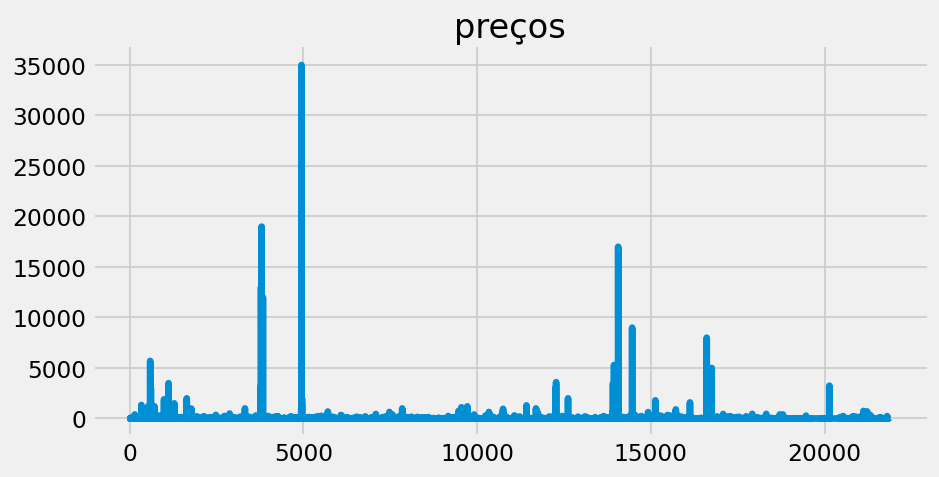

In [393]:
# @title preços

from matplotlib import pyplot as plt

df_wanted["preços"].plot(kind="line", figsize=(8, 4), title="preços")
plt.gca().spines[["top", "right"]].set_visible(False)

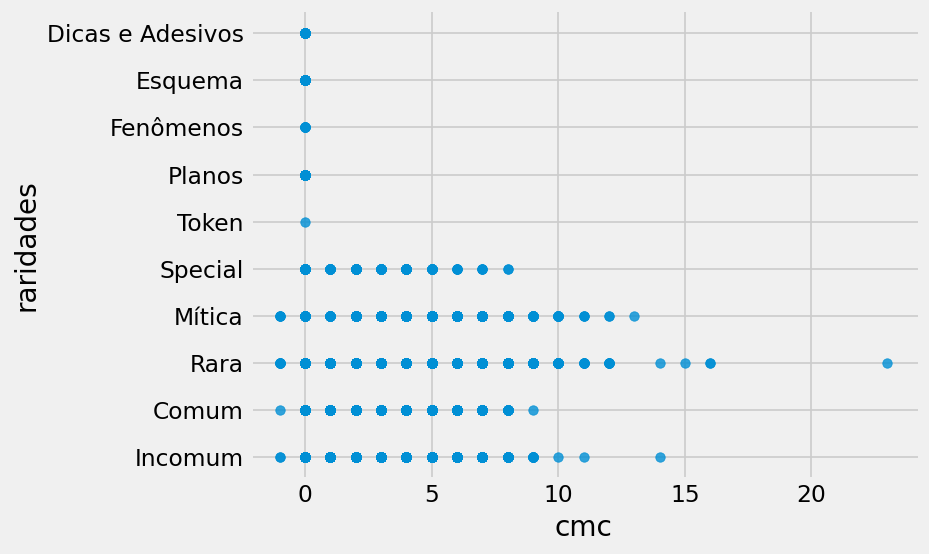

In [394]:
# @title cmc vs raridades

from matplotlib import pyplot as plt

df_wanted.plot(kind="scatter", x="cmc", y="raridades", s=32, alpha=0.8)
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

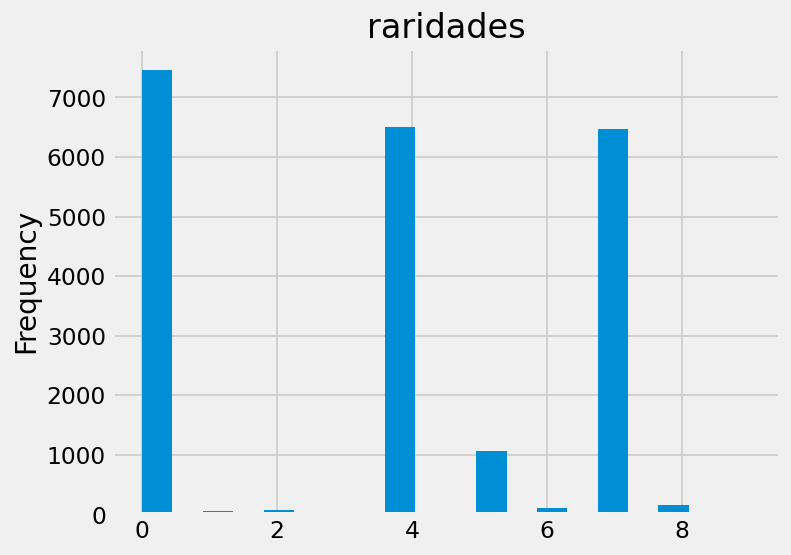

In [395]:
# @title raridades

from matplotlib import pyplot as plt

df_wanted["rarity_categorized"].plot(kind="hist", bins=20, title="raridades")
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(True)

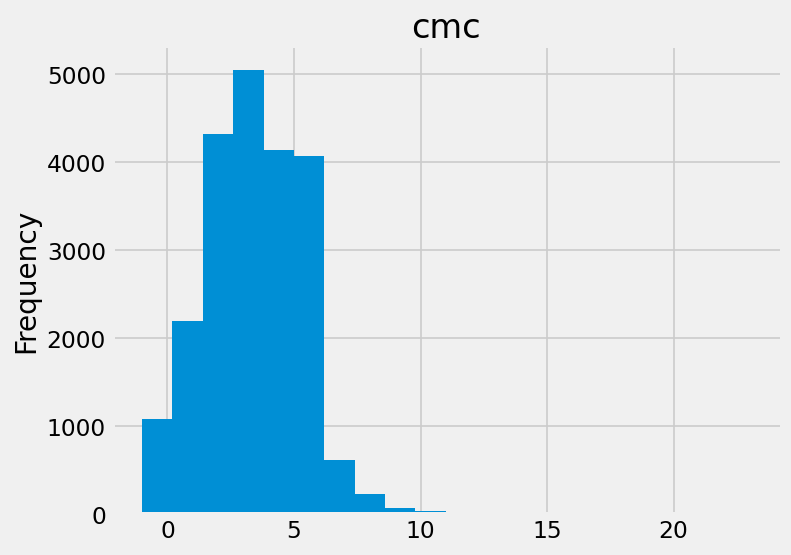

In [396]:
# @title cmc

from matplotlib import pyplot as plt

df_wanted["cmc"].plot(kind="hist", bins=20, title="cmc")
plt.gca().spines[
    [
        "top",
        "right",
    ]
].set_visible(False)

# Filtrando por Tipo

In [397]:
df_name = df_wanted["name"]
df_wanted.drop(columns=["name"], inplace=True)
df_wanted.set_index(df_name, inplace=True)

In [398]:
norarity = ["Planos", "Token", "Esquemas", "Dicas e Adesivos", "Fenômenos"]
for K in norarity:
    df_wanted.drop(df_wanted.loc[df_wanted["raridades"] == f"{K}"].index, inplace=True)

In [399]:
df_wanted2 = df_wanted.drop(columns="lealdade")
notributes = ["power", "resistence"]
df_wanted3 = df_wanted2.drop(columns=[col for col in df_wanted2 if col in notributes])
df_wanted4 = df_wanted3.drop(columns="cmc")
df_wanted5 = df_wanted.drop(columns=[col for col in df_wanted2 if col in notributes])

In [400]:
df_art = df_wanted2.loc[df_wanted["tipo"].str.contains("Artifact")]
df_mag = df_wanted3.loc[df_wanted["tipo"].str.contains("Sorcery")]
df_inst = df_wanted3.loc[df_wanted["tipo"].str.contains("Instant")]
df_enc = df_wanted3.loc[df_wanted["tipo"].str.contains("Enchantment")]
df_terr = df_wanted4.loc[df_wanted["tipo"].str.contains("Land")]
df_crea = df_wanted2.loc[df_wanted["tipo"].str.contains("Creature")]
df_planes = df_wanted5.loc[df_wanted["tipo"].str.contains("Planeswalker")]

In [401]:
df_art

tipo  cmc power resistence  \
name                                                                    
Angel's Feather                        Artifact    2    -1         -1   
Bottle Gnomes         Artifact Creature — Gnome    3     1          3   
Chimeric Staff                         Artifact    4    -1         -1   
Chromatic Star                         Artifact    1    -1         -1   
Citanul Flute                          Artifact    5    -1         -1   
...                                         ...  ...   ...        ...   
Sentinel Totem                         Artifact    1    -1         -1   
Sleek Schooner               Artifact — Vehicle    3     4          3   
Eternity Vessel                        Artifact    6    -1         -1   
Hedron Scrabbler  Artifact Creature — Construct    2     1          1   
Khalni Gem                             Artifact    4    -1         -1   

                                                              texto raridades  \
name                                                                            
Angel's Feather   Whenever a player casts a white spell, you may...   Incomum   
Bottle Gnomes             Sacrifice Bottle Gnomes: You gain 3 life.   Incomum   
Chimeric Staff    {X}: Chimeric Staff becomes an X/X Construct a...      Rara   
Chromatic Star    {1}, {T}, Sacrifice Chromatic Star: Add one ma...   Incomum   
Citanul Flute     {X}, {T}: Search your library for a creature c...      Rara   
...                                                             ...       ...   
Sentinel Totem    When Sentinel Totem enters the battlefield, sc...   Incomum   
Sleek Schooner    Crew 1 (Tap any number of creatures you contro...   Incomum   
Eternity Vessel   Eternity Vessel enters the battlefield with X ...    Mítica   
Hedron Scrabbler  Landfall — Whenever a land enters the battlefi...     Comum   
Khalni Gem        When Khalni Gem enters the battlefield, return...   Incomum   

                  preços  rarity_categorized  
name                                          
Angel's Feather     0.09                   4  
Bottle Gnomes       0.20                   4  
Chimeric Staff      0.36                   7  
Chromatic Star      0.00                   4  
Citanul Flute       6.20                   7  
...                  ...                 ...  
Sentinel Totem      0.08                   4  
Sleek Schooner      0.05                   4  
Eternity Vessel     9.75                   5  
Hedron Scrabbler    0.04                   0  
Khalni Gem          0.10                   4  

[2245 rows x 8 columns]

In [402]:
df_crea["tipo"].values

array(['Creature — Human Cleric', 'Creature — Angel', 'Creature — Wall',
       ..., 'Creature — Elemental', 'Artifact Creature — Construct',
       'Creature — Sphinx Rogue'], dtype=object)

In [403]:
to_drop2 = [
    "*",
    "1+*",
    "2+*",
    "-1",
    "+1",
    "+3",
    "3.5",
    "?",
    "∞",
    "2.5",
    "1.5",
    "99",
    ".5",
    "*²",
    "+4",
    "+0",
    "+2",
    -1,
]
for k in range(len(to_drop2)):
    df_crea = df_crea[df_crea.power != to_drop2[k]]

In [404]:
to_drop2 = ["*", "1+*", "+1", "3.5", "?", "1.5", "0", -1]
for k in range(len(to_drop2)):
    df_crea = df_crea[df_crea.resistence != to_drop2[k]]

In [405]:
df_crea["power"] = df_crea["power"].astype(float)
df_crea["resistence"] = df_crea["resistence"].astype(float)

# Criaturas

In [466]:
df_crea

tipo  cmc  power  resistence  \
name                                                                          
Ancestor's Chosen           Creature — Human Cleric    7    4.0         4.0   
Angel of Mercy                     Creature — Angel    5    3.0         3.0   
Angelic Wall                        Creature — Wall    2    0.0         4.0   
Aven Cloudchaser            Creature — Bird Soldier    4    2.0         2.0   
Ballista Squad               Creature — Human Rebel    4    2.0         2.0   
...                                             ...  ...    ...         ...   
Timbermaw Larva                    Creature — Beast    4    2.0         2.0   
Turntimber Ranger  Creature — Elf Scout Ranger Ally    5    2.0         2.0   
Zendikar Farguide              Creature — Elemental    5    3.0         3.0   
Hedron Scrabbler      Artifact Creature — Construct    2    1.0         1.0   
Enigma Thief                Creature — Sphinx Rogue    7    5.0         5.0   

                                                               texto  \
name                                                                   
Ancestor's Chosen  First strike (This creature deals combat damag...   
Angel of Mercy     FlyingWhen Angel of Mercy enters the battlefie...   
Angelic Wall            Defender (This creature can’t attack.)Flying   
Aven Cloudchaser   Flying (This creature can’t be blocked except ...   
Ballista Squad     {X}{W}, {T}: Ballista Squad deals X damage to ...   
...                                                              ...   
Timbermaw Larva    Whenever Timbermaw Larva attacks, it gets +1/+...   
Turntimber Ranger  Whenever Turntimber Ranger or another Ally ent...   
Zendikar Farguide  Forestwalk (This creature can’t be blocked as ...   
Hedron Scrabbler   Landfall — Whenever a land enters the battlefi...   
Enigma Thief       Prowl {3}{U} (You may cast this spell for its ...   

                  raridades  preços  rarity_categorized  cluster_textclass  
name                                                                        
Ancestor's Chosen   Incomum    0.08                   4                427  
Angel of Mercy        Comum    0.10                   0                236  
Angelic Wall          Comum    0.04                   0                359  
Aven Cloudchaser      Comum    0.05                   0                145  
Ballista Squad      Incomum    0.10                   4                149  
...                     ...     ...                 ...                ...  
Timbermaw Larva       Comum    0.05                   0                336  
Turntimber Ranger      Rara    0.87                   7                 19  
Zendikar Farguide     Comum    0.04                   0                 15  
Hedron Scrabbler      Comum    0.04                   0                108  
Enigma Thief           Rara    0.87                   7                205  

[11300 rows x 9 columns]

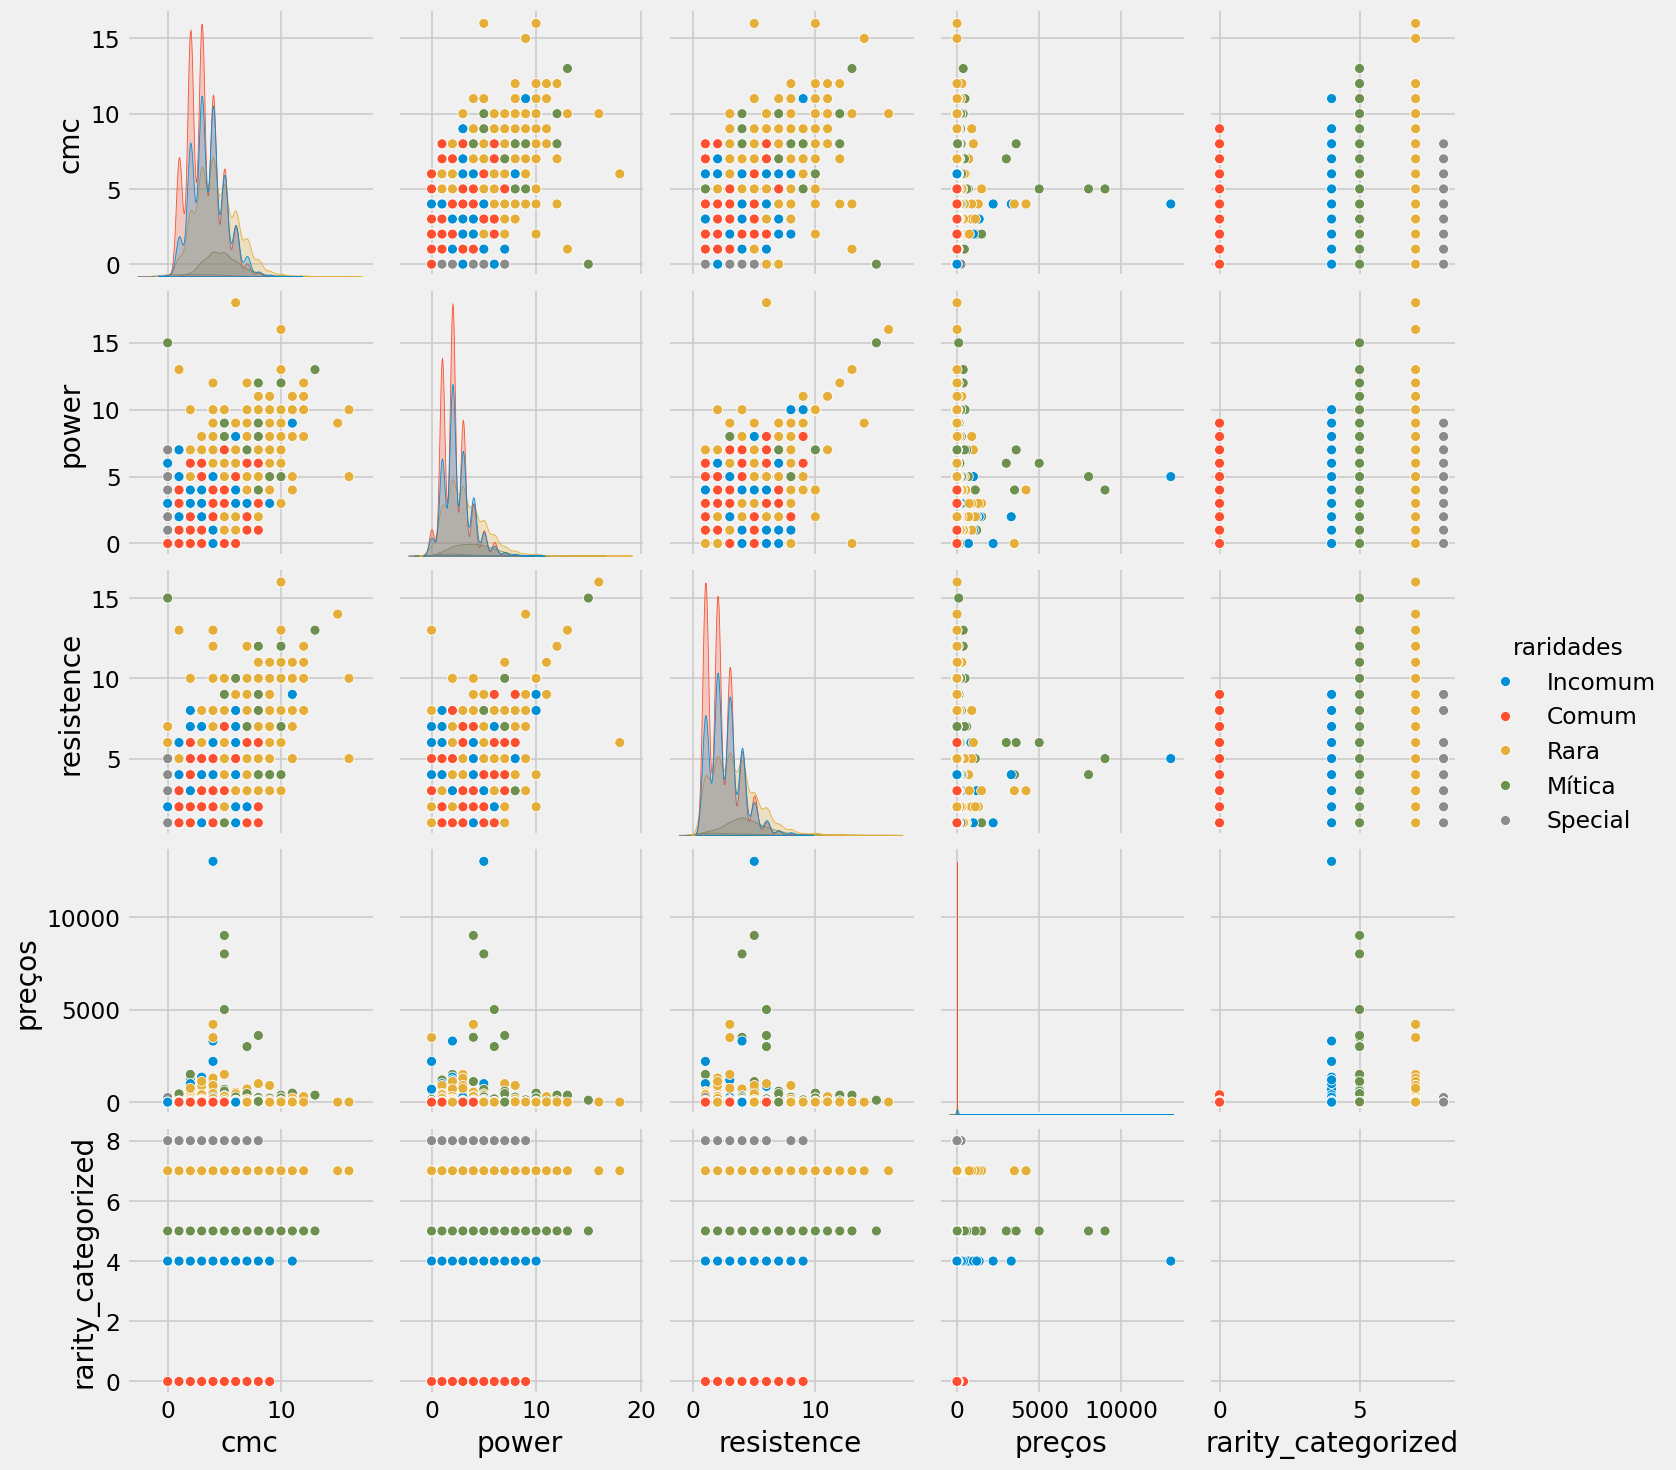

In [407]:
import seaborn as sns

sns.pairplot(df_crea, hue="raridades")

Clusterizando os textos 

In [411]:
from sentence_transformers import SentenceTransformer, util

In [467]:
df_crea["texto"].replace(r"\s+|\\n", " ", regex=True, inplace=True)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2058992202.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2058992202.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [468]:
to_drop2 = [-1]
for k in range(len(to_drop2)):
    df_crea = df_crea[df_crea.texto != to_drop2[k]]

In [469]:
sentences = df_crea.texto.to_list()
embedder = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
corpus_embeddings = embedder.encode(sentences)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings / np.linalg.norm(
    corpus_embeddings, axis=1, keepdims=True
)
clustering_model = KMeans(n_clusters=539)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
df_crea["cluster_textclass"] = cluster_assignment

Clusterização Geral (Texto + Atributos)


In [470]:
noatributes = ["tipo", "texto", "preços", "raridades"]
feature = df_crea.drop(columns=[col for col in df_crea if col in noatributes])
target = df_crea["preços"]

In [471]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    feature, target, test_size=0.1, random_state=None
)  # hold out 20% of the data for final testing

1334
0.370219098732283


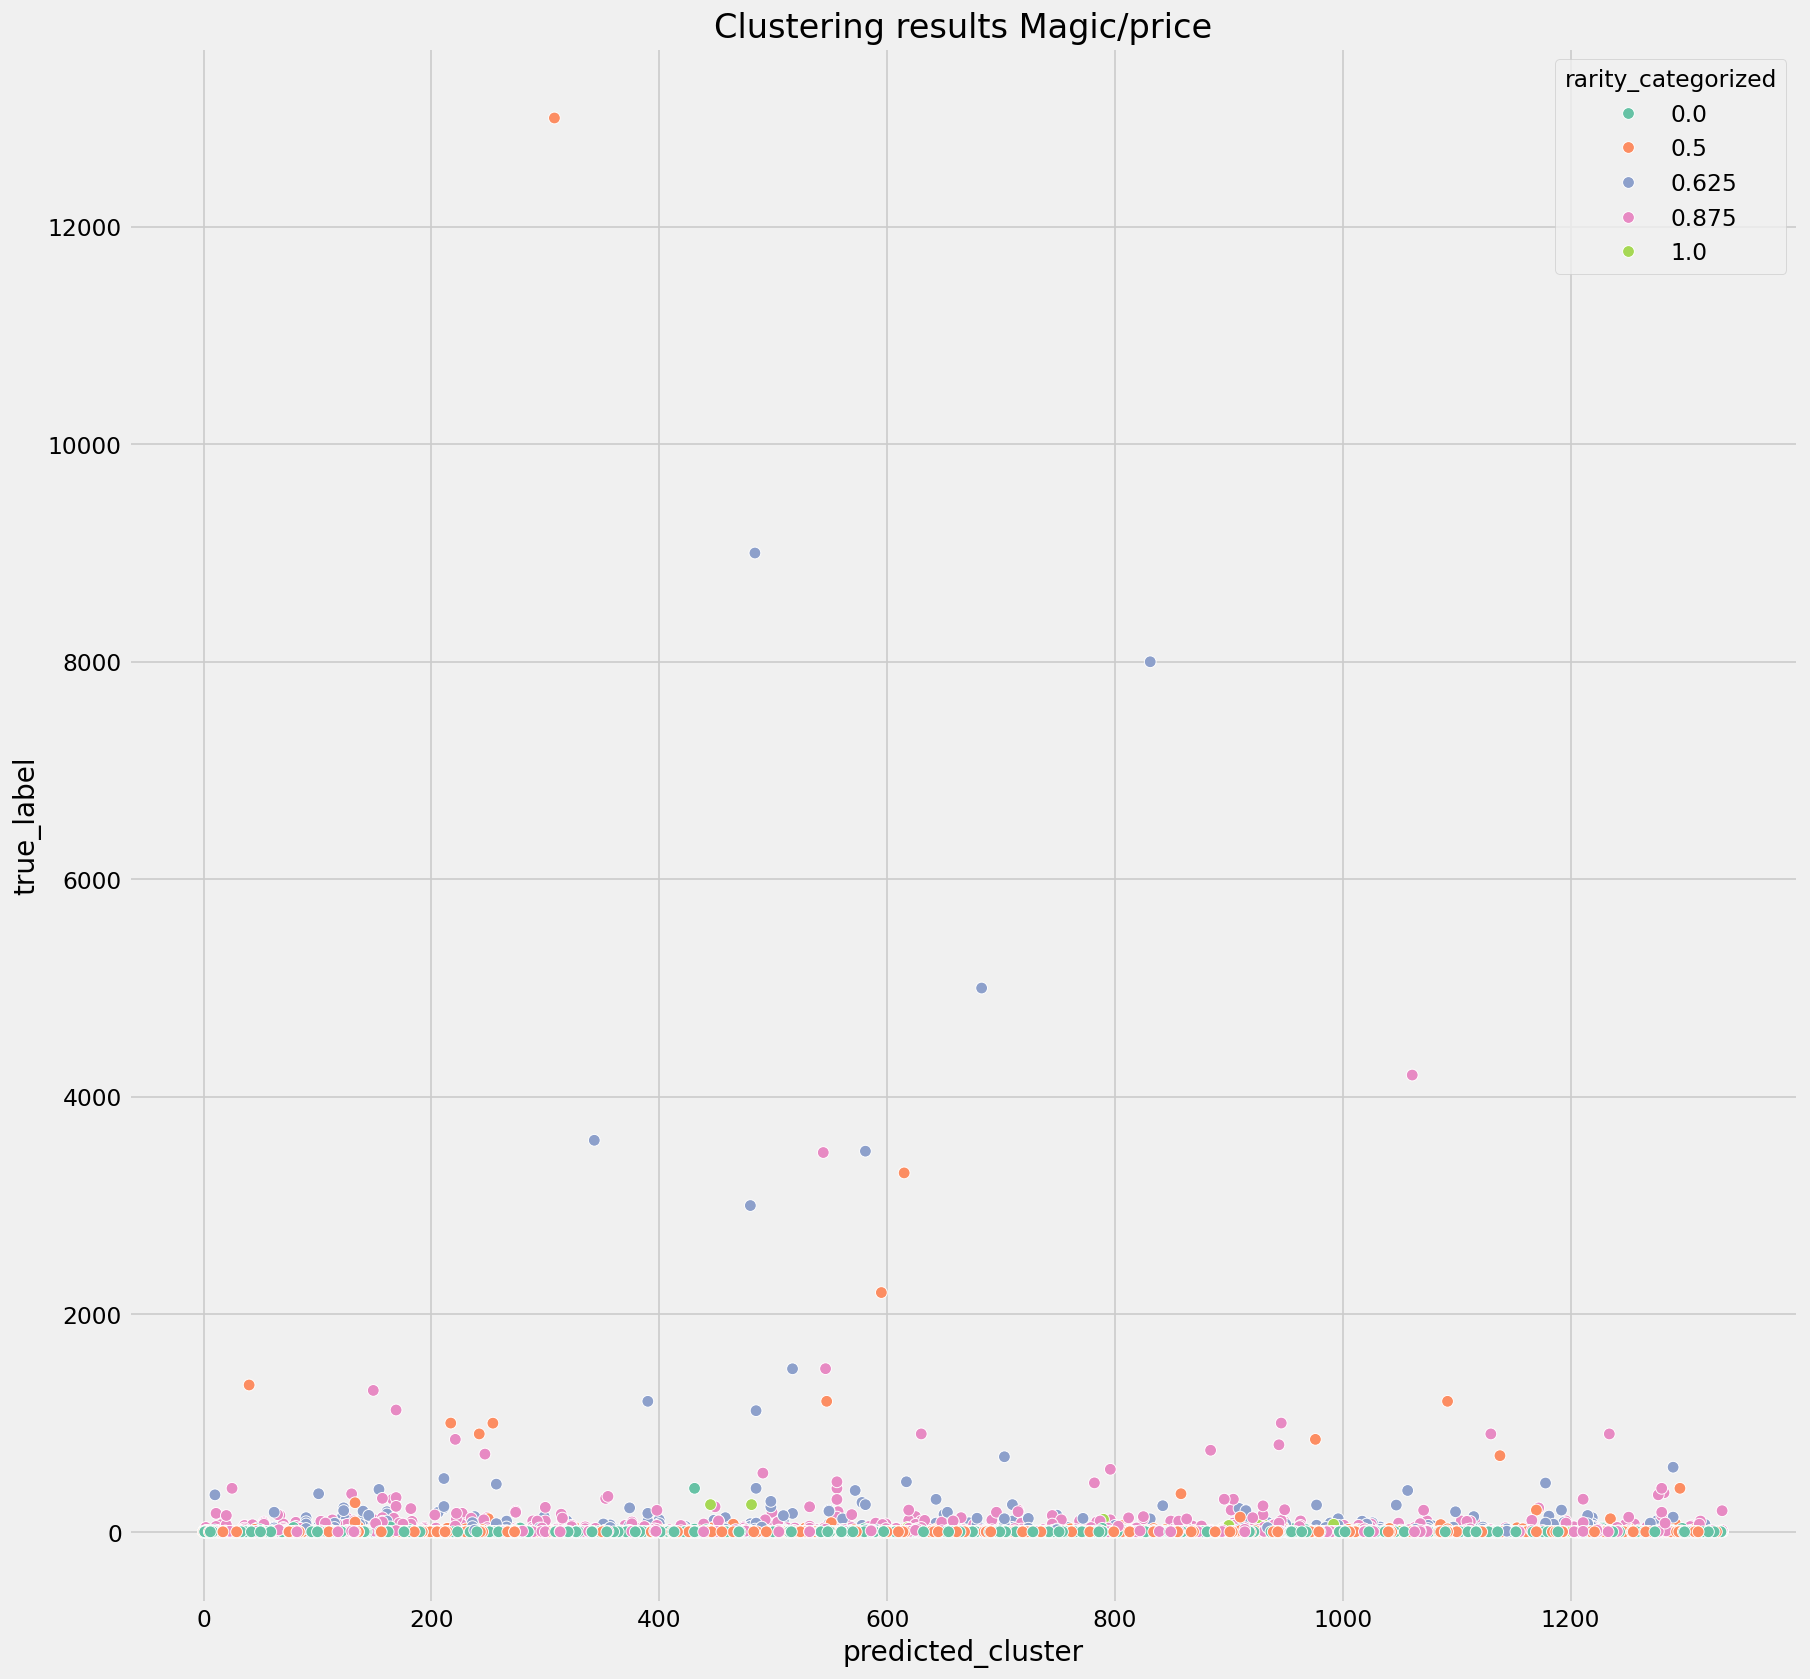

In [472]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(target)
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

print(n_clusters)
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        # ("pca", PCA(n_components=5, random_state=42)),
    ]
)
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)
pipe = Pipeline([("preprocessor", preprocessor), ("clusterer", clusterer)])
pipe.fit(feature)
preprocessed_data = pipe["preprocessor"].transform(feature)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(silhouette_score(preprocessed_data, predicted_labels))
adjusted_rand_score(true_labels, predicted_labels)
plt.rcParams["figure.dpi"] = 120
dfcluster = pd.DataFrame(
    pipe["preprocessor"].transform(feature),
    columns=feature.columns,
)

dfcluster["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
dfcluster["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 16))

scat = sns.scatterplot(
    data=dfcluster[
        ["predicted_cluster", "cluster_textclass", "true_label", "rarity_categorized"]
    ],
    x="predicted_cluster",
    y="true_label",
    s=50,
    hue="rarity_categorized",
    # style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results Magic/price")

plt.show()

In [473]:
from umap import UMAP
import plotly.express as px

features = dfcluster

umap_2d = UMAP(n_components=2, init="random", random_state=42)
umap_3d = UMAP(n_components=3, init="random", random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d,
    x=dfcluster["cluster_textclass"],
    y=dfcluster["predicted_cluster"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d = px.scatter_3d(
    proj_3d,
    y=dfcluster["cluster_textclass"],
    x=dfcluster["predicted_cluster"],
    z=dfcluster["true_label"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d.update_traces(marker_size=2)

fig_2d.show()
fig_3d.show()

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Previsão do preço

In [474]:
X_test

cmc  power  resistence  rarity_categorized  \
name                                                                    
Battering Sliver             6    4.0         4.0                   0   
Soratami Savant              4    2.0         2.0                   4   
Tolarian Serpent             7    7.0         7.0                   7   
Kazarov, Sengir Pureblood    7    4.0         4.0                   7   
Crowned Ceratok              4    4.0         3.0                   0   
...                        ...    ...         ...                 ...   
Gavony Unhallowed            4    2.0         4.0                   0   
Carrion Thrash               5    4.0         4.0                   0   
Kragma Warcaller             5    2.0         3.0                   4   
Elvish Skysweeper            1    1.0         1.0                   0   
Joyful Stormsculptor         5    2.0         3.0                   4   

                           cluster_textclass  
name                                          
Battering Sliver                         259  
Soratami Savant                          389  
Tolarian Serpent                         249  
Kazarov, Sengir Pureblood                 95  
Crowned Ceratok                          170  
...                                      ...  
Gavony Unhallowed                        165  
Carrion Thrash                           165  
Kragma Warcaller                          97  
Elvish Skysweeper                        267  
Joyful Stormsculptor                     489  

[1130 rows x 5 columns]

Usando carta do conjunto de teste

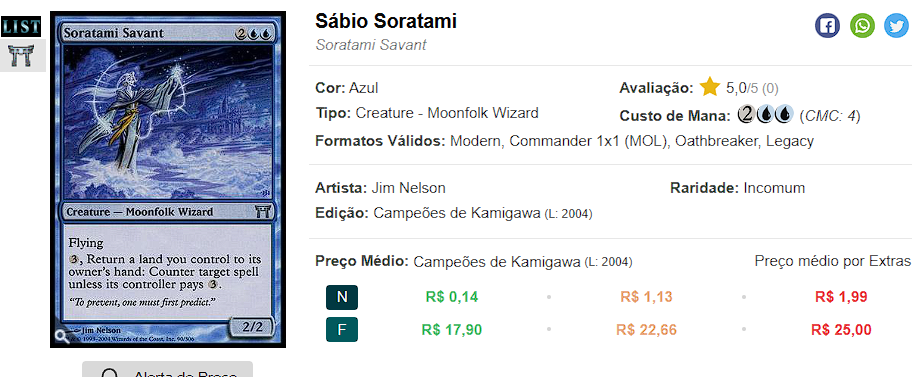

In [476]:
test_text = "Flying {3}, Return a land you control to its owner’s hand: Counter target spell unless its controller pays {3}."
textclass = clustering_model.predict(embedder.encode(test_text).reshape(1, -1))
# alterar valores conforme atributos da carta a ser testada e o valor de saída de classificação do texto
valores = [[4, 2, 2, 4, textclass]]

test_input = pd.DataFrame(
    valores,
    columns=["cmc", "power", "resistence", "rarity_categorized", "cluster_textclass"],
)

In [477]:
dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
from scipy import stats

value_list = dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
stats.bayes_mvs(value_list, 0.908)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\596269036.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\596269036.py:7: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



(Mean(statistic=0.5454545454545454, minmax=(0.09663107364519341, 0.9942780172638973)),
 Variance(statistic=1.5712813397129188, minmax=(0.9041395485065018, 2.614513033096402)),
 Std_dev(statistic=1.2371296193938557, minmax=(0.9508625287109076, 1.6169455875496868)))

É Possivel averiguar que o algoritmo consegue agrupar cartas que estatisticamente daram o preço aproximado de qualquer carta que se assemelhe com as do devido cluster.

# Artefatos



In [478]:
to_drop2 = [
    "*",
    "1+*",
    "2+*",
    "-1",
    "+1",
    "+3",
    "3.5",
    "?",
    "∞",
    "2.5",
    "1.5",
    "99",
    ".5",
    "*²",
    "+4",
    "+0",
    "+2",
]
for k in range(len(to_drop2)):
    df_art = df_art[df_art.power != to_drop2[k]]

In [479]:
df_art

tipo  cmc power resistence  \
name                                                                    
Angel's Feather                        Artifact    2     0          0   
Bottle Gnomes         Artifact Creature — Gnome    3     1          3   
Chimeric Staff                         Artifact    4     0          0   
Chromatic Star                         Artifact    1     0          0   
Citanul Flute                          Artifact    5     0          0   
...                                         ...  ...   ...        ...   
Sentinel Totem                         Artifact    1     0          0   
Sleek Schooner               Artifact — Vehicle    3     4          3   
Eternity Vessel                        Artifact    6     0          0   
Hedron Scrabbler  Artifact Creature — Construct    2     1          1   
Khalni Gem                             Artifact    4     0          0   

                                                              texto raridades  \
name                                                                            
Angel's Feather   Whenever a player casts a white spell, you may...   Incomum   
Bottle Gnomes             Sacrifice Bottle Gnomes: You gain 3 life.   Incomum   
Chimeric Staff    {X}: Chimeric Staff becomes an X/X Construct a...      Rara   
Chromatic Star    {1}, {T}, Sacrifice Chromatic Star: Add one ma...   Incomum   
Citanul Flute     {X}, {T}: Search your library for a creature c...      Rara   
...                                                             ...       ...   
Sentinel Totem    When Sentinel Totem enters the battlefield, sc...   Incomum   
Sleek Schooner    Crew 1 (Tap any number of creatures you contro...   Incomum   
Eternity Vessel   Eternity Vessel enters the battlefield with X ...    Mítica   
Hedron Scrabbler  Landfall — Whenever a land enters the battlefi...     Comum   
Khalni Gem        When Khalni Gem enters the battlefield, return...   Incomum   

                  preços  rarity_categorized  cluster_textclass  
name                                                             
Angel's Feather     0.09                   4                156  
Bottle Gnomes       0.20                   4                577  
Chimeric Staff      0.36                   7                361  
Chromatic Star      0.00                   4                354  
Citanul Flute       6.20                   7                 27  
...                  ...                 ...                ...  
Sentinel Totem      0.08                   4                435  
Sleek Schooner      0.05                   4                285  
Eternity Vessel     9.75                   5                298  
Hedron Scrabbler    0.04                   0                 84  
Khalni Gem          0.10                   4                354  

[2232 rows x 9 columns]

In [480]:
df_art["power"].replace(-1, 0, inplace=True)
df_art["resistence"].replace(-1, 0, inplace=True)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2579689678.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2579689678.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

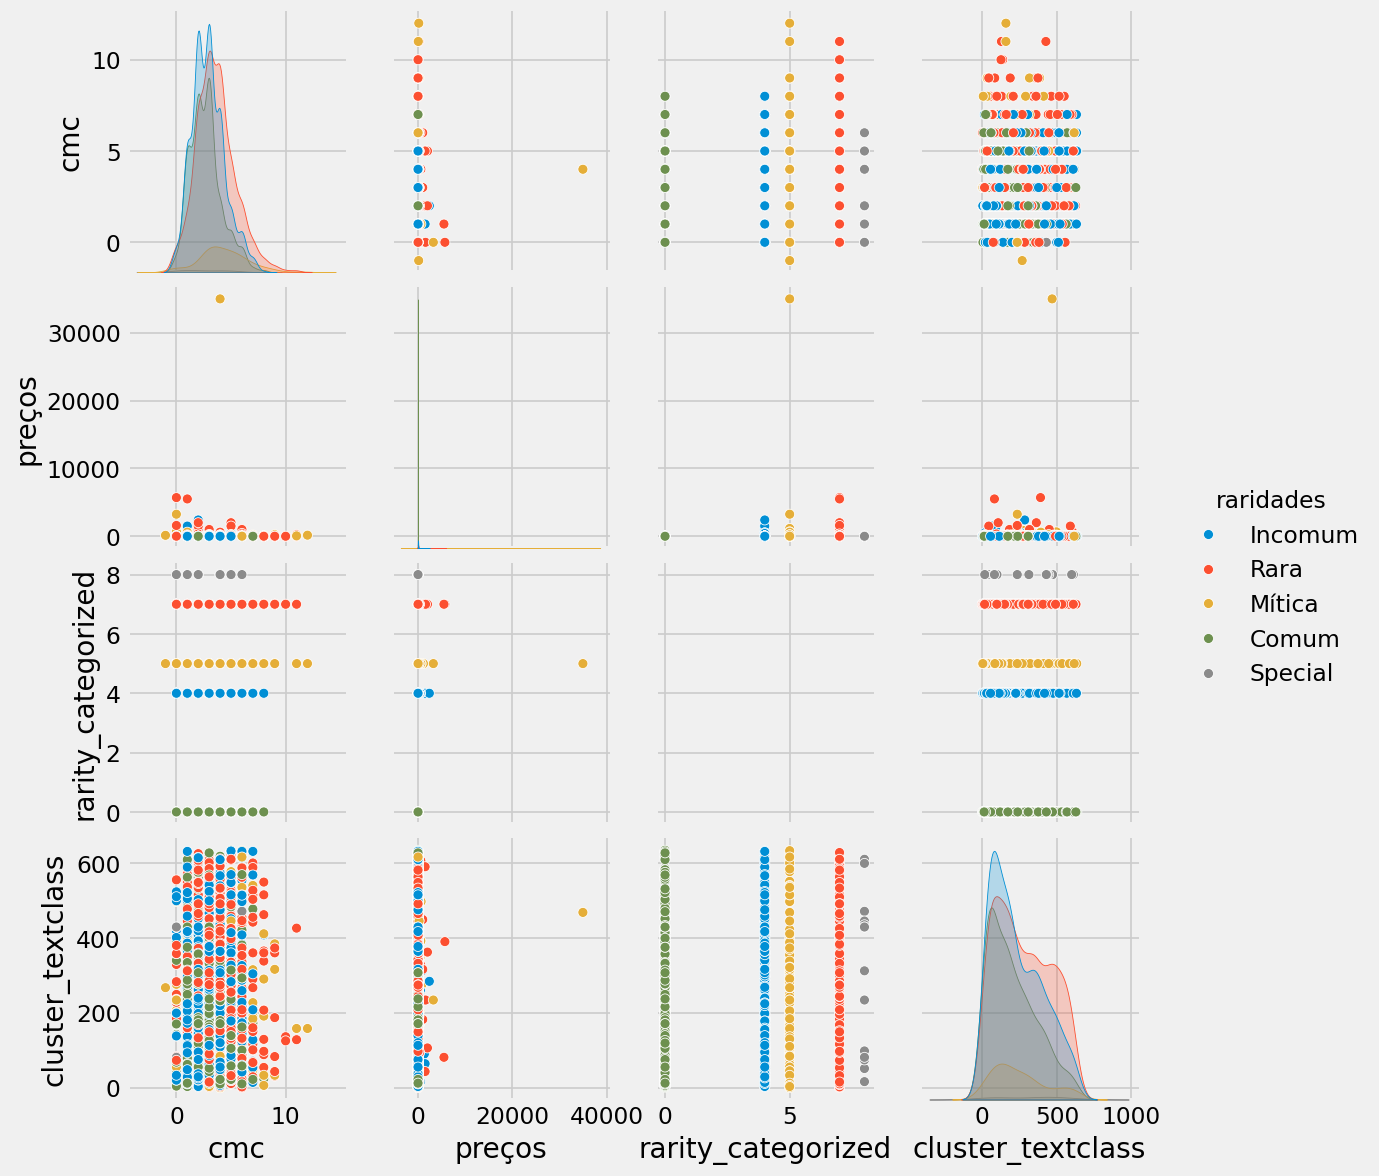

In [483]:
import seaborn as sns

sns.pairplot(df_art, hue="raridades")

Clusterizando os textos

In [482]:
sentences = df_art.texto.to_list()
embedder = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
corpus_embeddings = embedder.encode(sentences)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings / np.linalg.norm(
    corpus_embeddings, axis=1, keepdims=True
)
clustering_model = KMeans(n_clusters=635)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
df_art["cluster_textclass"] = cluster_assignment

Clusterização Geral (textos + atributos)

In [489]:
noatributes = [
    "tipo",
    "texto",
    "preços",
    "raridades",
]
feature = df_art.drop(columns=[col for col in df_art if col in noatributes])
target = df_art["preços"]

In [490]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=None
)  # hold out 20% of the data for final testing

635
0.4898591612316746


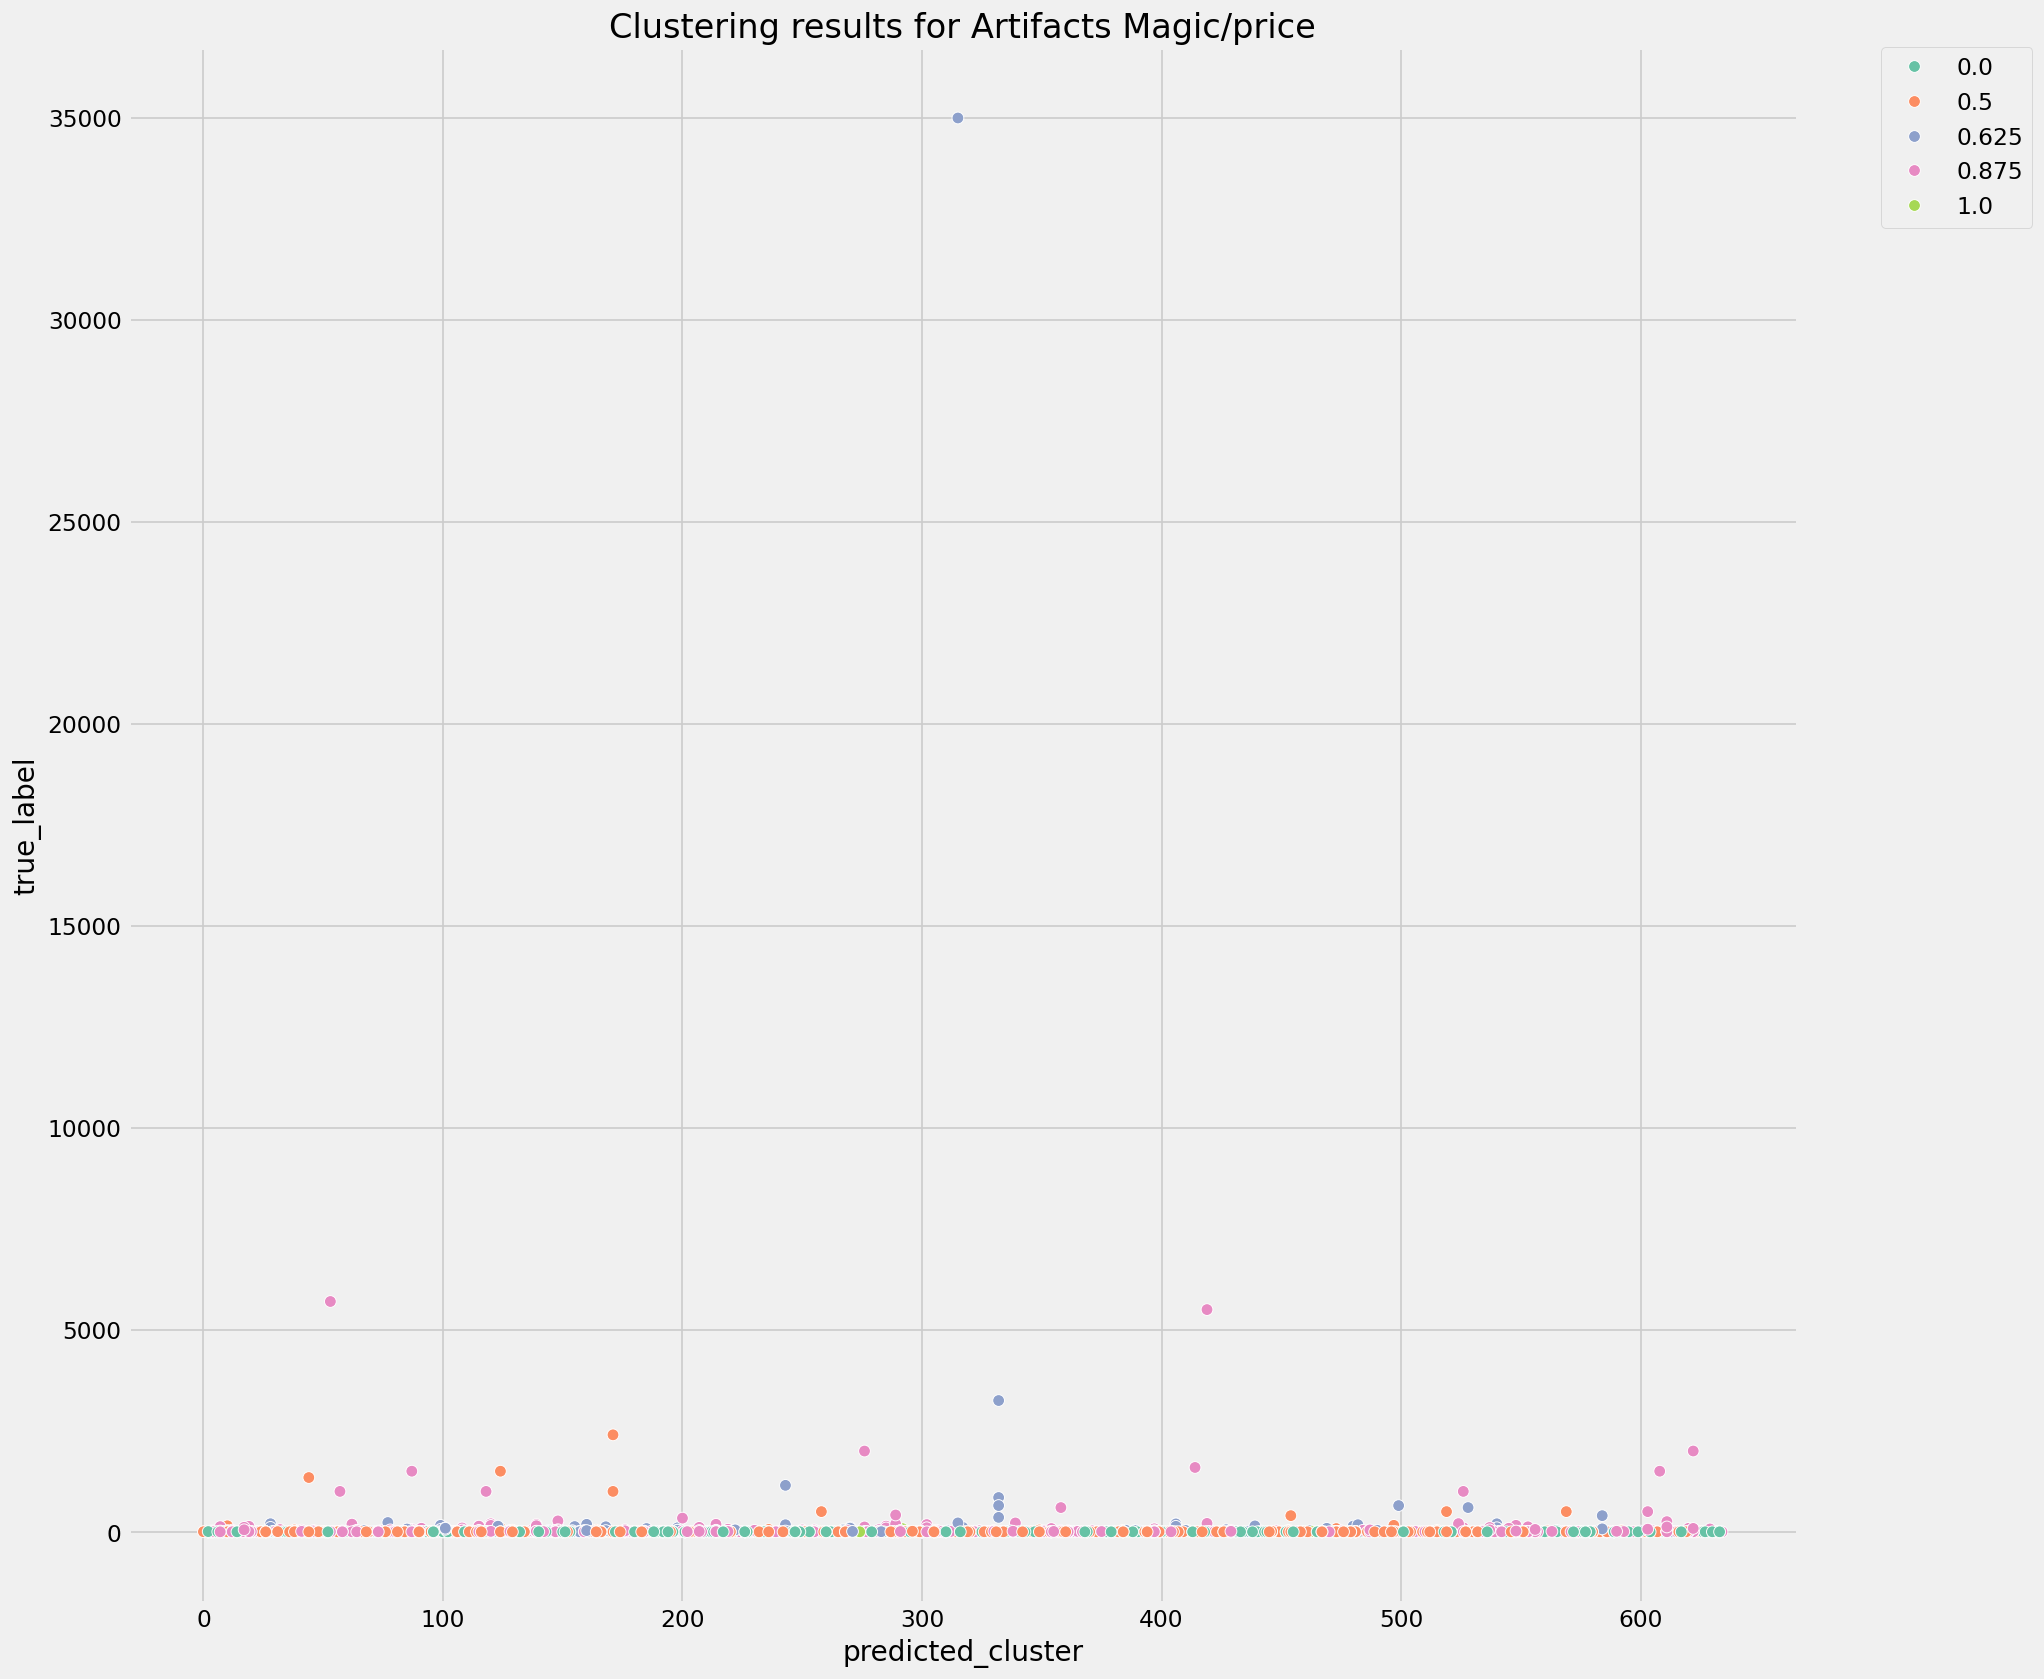

In [491]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(target)
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

print(n_clusters)
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        # ("pca", PCA(n_components=5, random_state=42)),
    ]
)
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)
pipe = Pipeline([("preprocessor", preprocessor), ("clusterer", clusterer)])
pipe.fit(feature)
preprocessed_data = pipe["preprocessor"].transform(feature)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(silhouette_score(preprocessed_data, predicted_labels))
adjusted_rand_score(true_labels, predicted_labels)
plt.rcParams["figure.dpi"] = 120
dfcluster = pd.DataFrame(
    pipe["preprocessor"].transform(feature),
    columns=feature.columns,
)

dfcluster["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
dfcluster["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 16))

scat = sns.scatterplot(
    data=dfcluster[
        ["predicted_cluster", "cluster_textclass", "true_label", "rarity_categorized"]
    ],
    x="predicted_cluster",
    y="true_label",
    s=50,
    hue="rarity_categorized",
    # style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results for Artifacts Magic/price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [492]:
from umap import UMAP
import plotly.express as px

features = dfcluster

umap_2d = UMAP(n_components=2, init="random", random_state=42)
umap_3d = UMAP(n_components=3, init="random", random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d,
    x=dfcluster["cluster_textclass"],
    y=dfcluster["predicted_cluster"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d = px.scatter_3d(
    proj_3d,
    y=dfcluster["cluster_textclass"],
    x=dfcluster["predicted_cluster"],
    z=dfcluster["true_label"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d.update_traces(marker_size=2)

fig_2d.show()
fig_3d.show()

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Previsão do preço

In [493]:
X_test

cmc power resistence  rarity_categorized  \
name                                                               
Immovable Rod             1     0          0                   7   
Marble Chalice            3     0          0                   0   
Lightning Coils           3     0          0                   7   
Tezzeret's Gatebreaker    4     0          0                   7   
Triarch Praetorian        2     2          1                   4   
...                     ...   ...        ...                 ...   
Slicer, Hired Muscle      5     3          4                   5   
Brass Man                 1     1          3                   4   
Plasmancer                4     3          3                   4   
Manaforce Mace            4     0          0                   4   
Ancient Stone Idol       10    12         12                   7   

                        cluster_textclass  
name                                       
Immovable Rod                         355  
Marble Chalice                         78  
Lightning Coils                       578  
Tezzeret's Gatebreaker                367  
Triarch Praetorian                    384  
...                                   ...  
Slicer, Hired Muscle                  309  
Brass Man                             287  
Plasmancer                            357  
Manaforce Mace                        182  
Ancient Stone Idol                    125  

[447 rows x 5 columns]

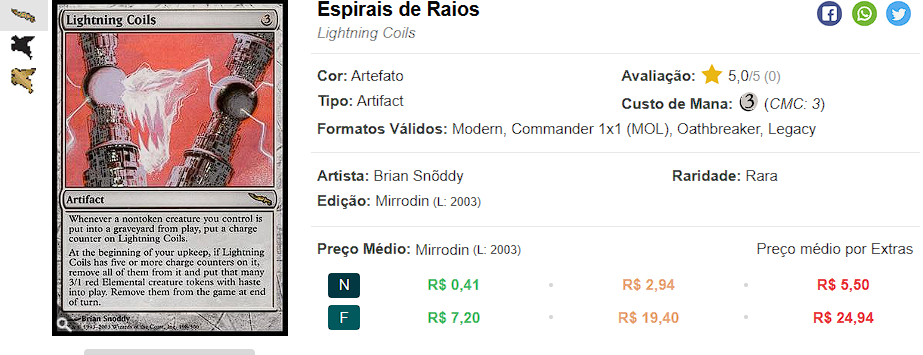

In [496]:
test_text = "Whenever a nontoken creature you control dies, put a charge counter on Lightning Coils. At the beginning of your upkeep, if Lightning Coils has five or more charge counters on it, remove all of them from it and create that many 3/1 red Elemental creature tokens with haste. Exile them at the beginning of the next end step."
textclass = clustering_model.predict(embedder.encode(test_text).reshape(1, -1))
# alterar valores conforme atributos da carta a ser testada e o valor de saída de classificação do texto
valores = [[3, 0, 0, 7, textclass]]

test_input = pd.DataFrame(
    valores,
    columns=["cmc", "power", "resistence", "rarity_categorized", "cluster_textclass"],
)
dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
from scipy import stats

value_list = dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
stats.bayes_mvs(value_list, 0.908)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\3531477334.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\3531477334.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



(Mean(statistic=3.598333333333333, minmax=(1.263952899887792, 5.932713766778873)),
 Variance(statistic=23.461307407407407, minmax=(10.582861009682881, 47.209195456124675)),
 Std_dev(statistic=4.711257448315072, minmax=(3.253130954892976, 6.870894807528688)))

Novamente podemos ver que os preços coincidem com a realidade em certo grau, seja no preço médio ou no valor dos extremos das cartas no cluster. O que mostra a acertividade em gerar previsões próximas da realidade.

# Encantamentos

Encantamentos

In [497]:
df_enc

tipo  cmc  \
name                                                
Angelic Chorus                   Enchantment    5   
Aura of Silence                  Enchantment    3   
Glorious Anthem                  Enchantment    3   
Heart of Light            Enchantment — Aura    3   
High Ground                      Enchantment    1   
...                                      ...  ...   
Quest for Pure Flame             Enchantment    1   
Zektar Shrine Expedition         Enchantment    2   
Gigantiform               Enchantment — Aura    5   
Quest for the Gemblades          Enchantment    2   
Savage Silhouette         Enchantment — Aura    3   

                                                                      texto  \
name                                                                          
Angelic Chorus            Whenever a creature enters the battlefield und...   
Aura of Silence           Artifact and enchantment spells your opponents...   
Glorious Anthem                            Creatures you control get +1/+1.   
Heart of Light            Enchant creature (Target a creature as you cas...   
High Ground               Each creature you control can block an additio...   
...                                                                     ...   
Quest for Pure Flame      Whenever a source you control deals damage to ...   
Zektar Shrine Expedition  Landfall — Whenever a land enters the battlefi...   
Gigantiform               Kicker {4}Enchant creatureEnchanted creature h...   
Quest for the Gemblades   Whenever a creature you control deals combat d...   
Savage Silhouette         Enchant creatureEnchanted creature gets +2/+2 ...   

                         raridades  preços  rarity_categorized  \
name                                                             
Angelic Chorus                Rara   12.34                   7   
Aura of Silence            Incomum   17.84                   4   
Glorious Anthem               Rara   19.80                   7   
Heart of Light               Comum    0.08                   0   
High Ground                Incomum    0.25                   4   
...                            ...     ...                 ...   
Quest for Pure Flame       Incomum    2.82                   4   
Zektar Shrine Expedition     Comum    0.06                   0   
Gigantiform                   Rara    0.34                   7   
Quest for the Gemblades    Incomum    0.08                   4   
Savage Silhouette            Comum    0.05                   0   

                          cluster_textclass  
name                                         
Angelic Chorus                           41  
Aura of Silence                         317  
Glorious Anthem                           2  
Heart of Light                           38  
High Ground                             136  
...                                     ...  
Quest for Pure Flame                    301  
Zektar Shrine Expedition                 71  
Gigantiform                             158  
Quest for the Gemblades                 261  
Savage Silhouette                       190  

[2536 rows x 7 columns]

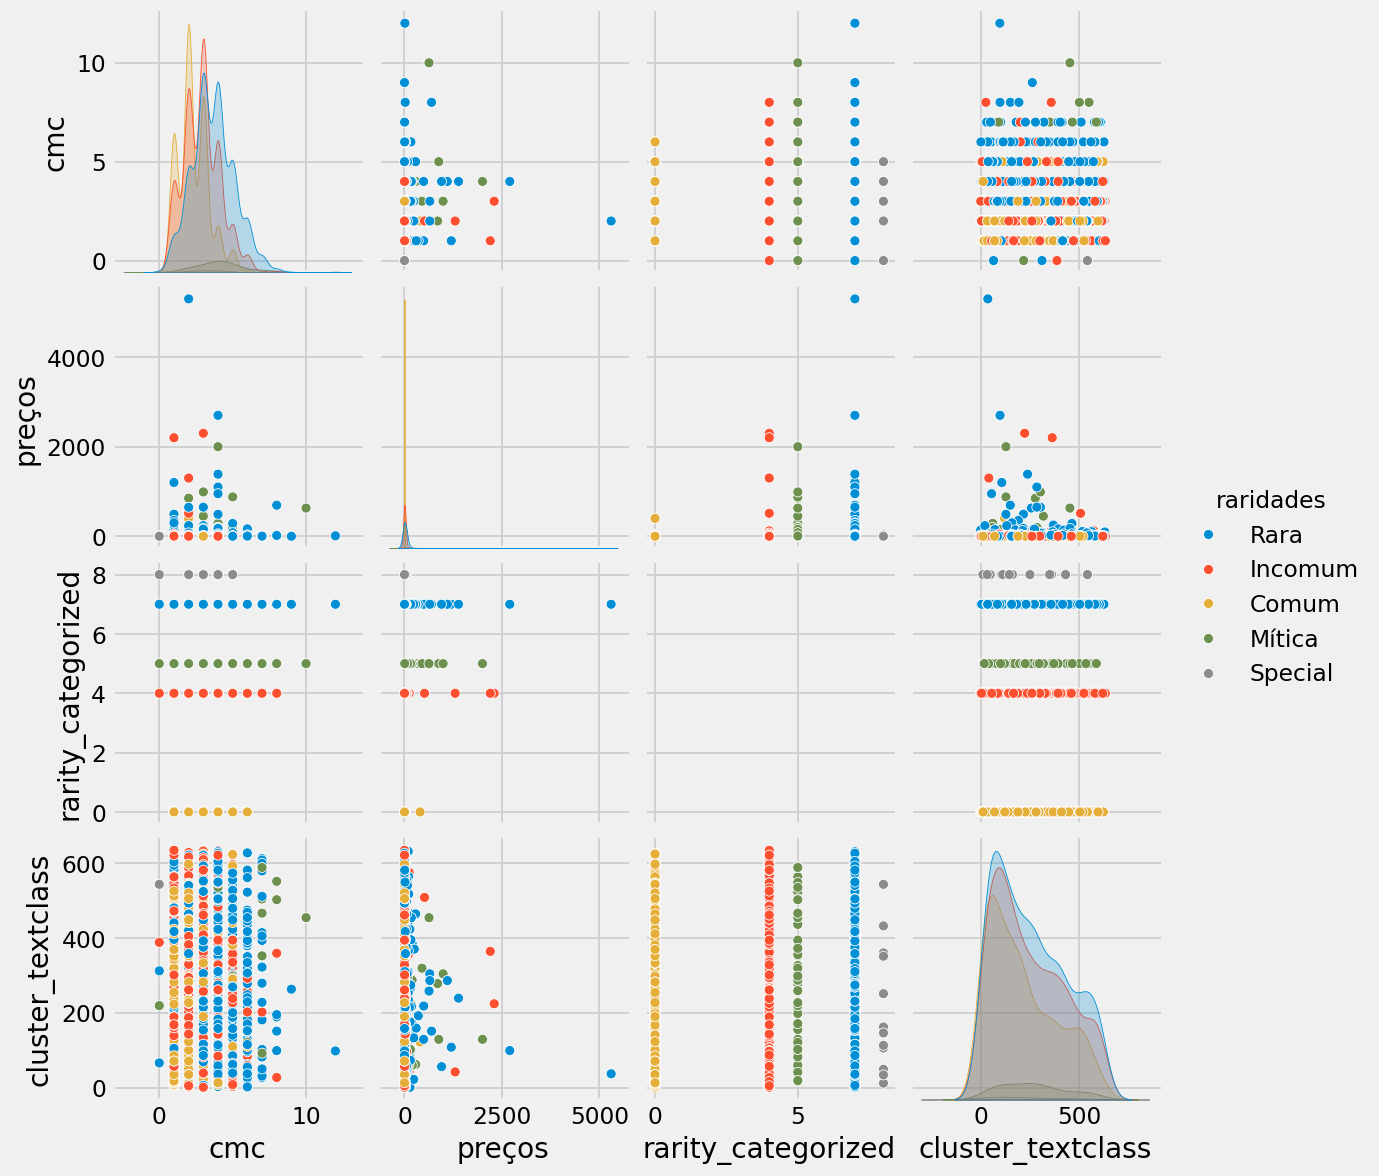

In [498]:
import seaborn as sns

sns.pairplot(df_enc, hue="raridades")

Clusterização do Texto

In [499]:
sentences = df_enc.texto.to_list()
embedder = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
corpus_embeddings = embedder.encode(sentences)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings / np.linalg.norm(
    corpus_embeddings, axis=1, keepdims=True
)
clustering_model = KMeans(n_clusters=635)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
df_enc["cluster_textclass"] = cluster_assignment

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2226855862.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clusterização Geral (Textos + Atributos)

In [500]:
noatributes = ["tipo", "texto", "preços", "raridades"]
feature = df_enc.drop(columns=[col for col in df_enc if col in noatributes])
target = df_enc["preços"]

In [501]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=None
)  # hold out 20% of the data for final testing

671
0.6371358204334666


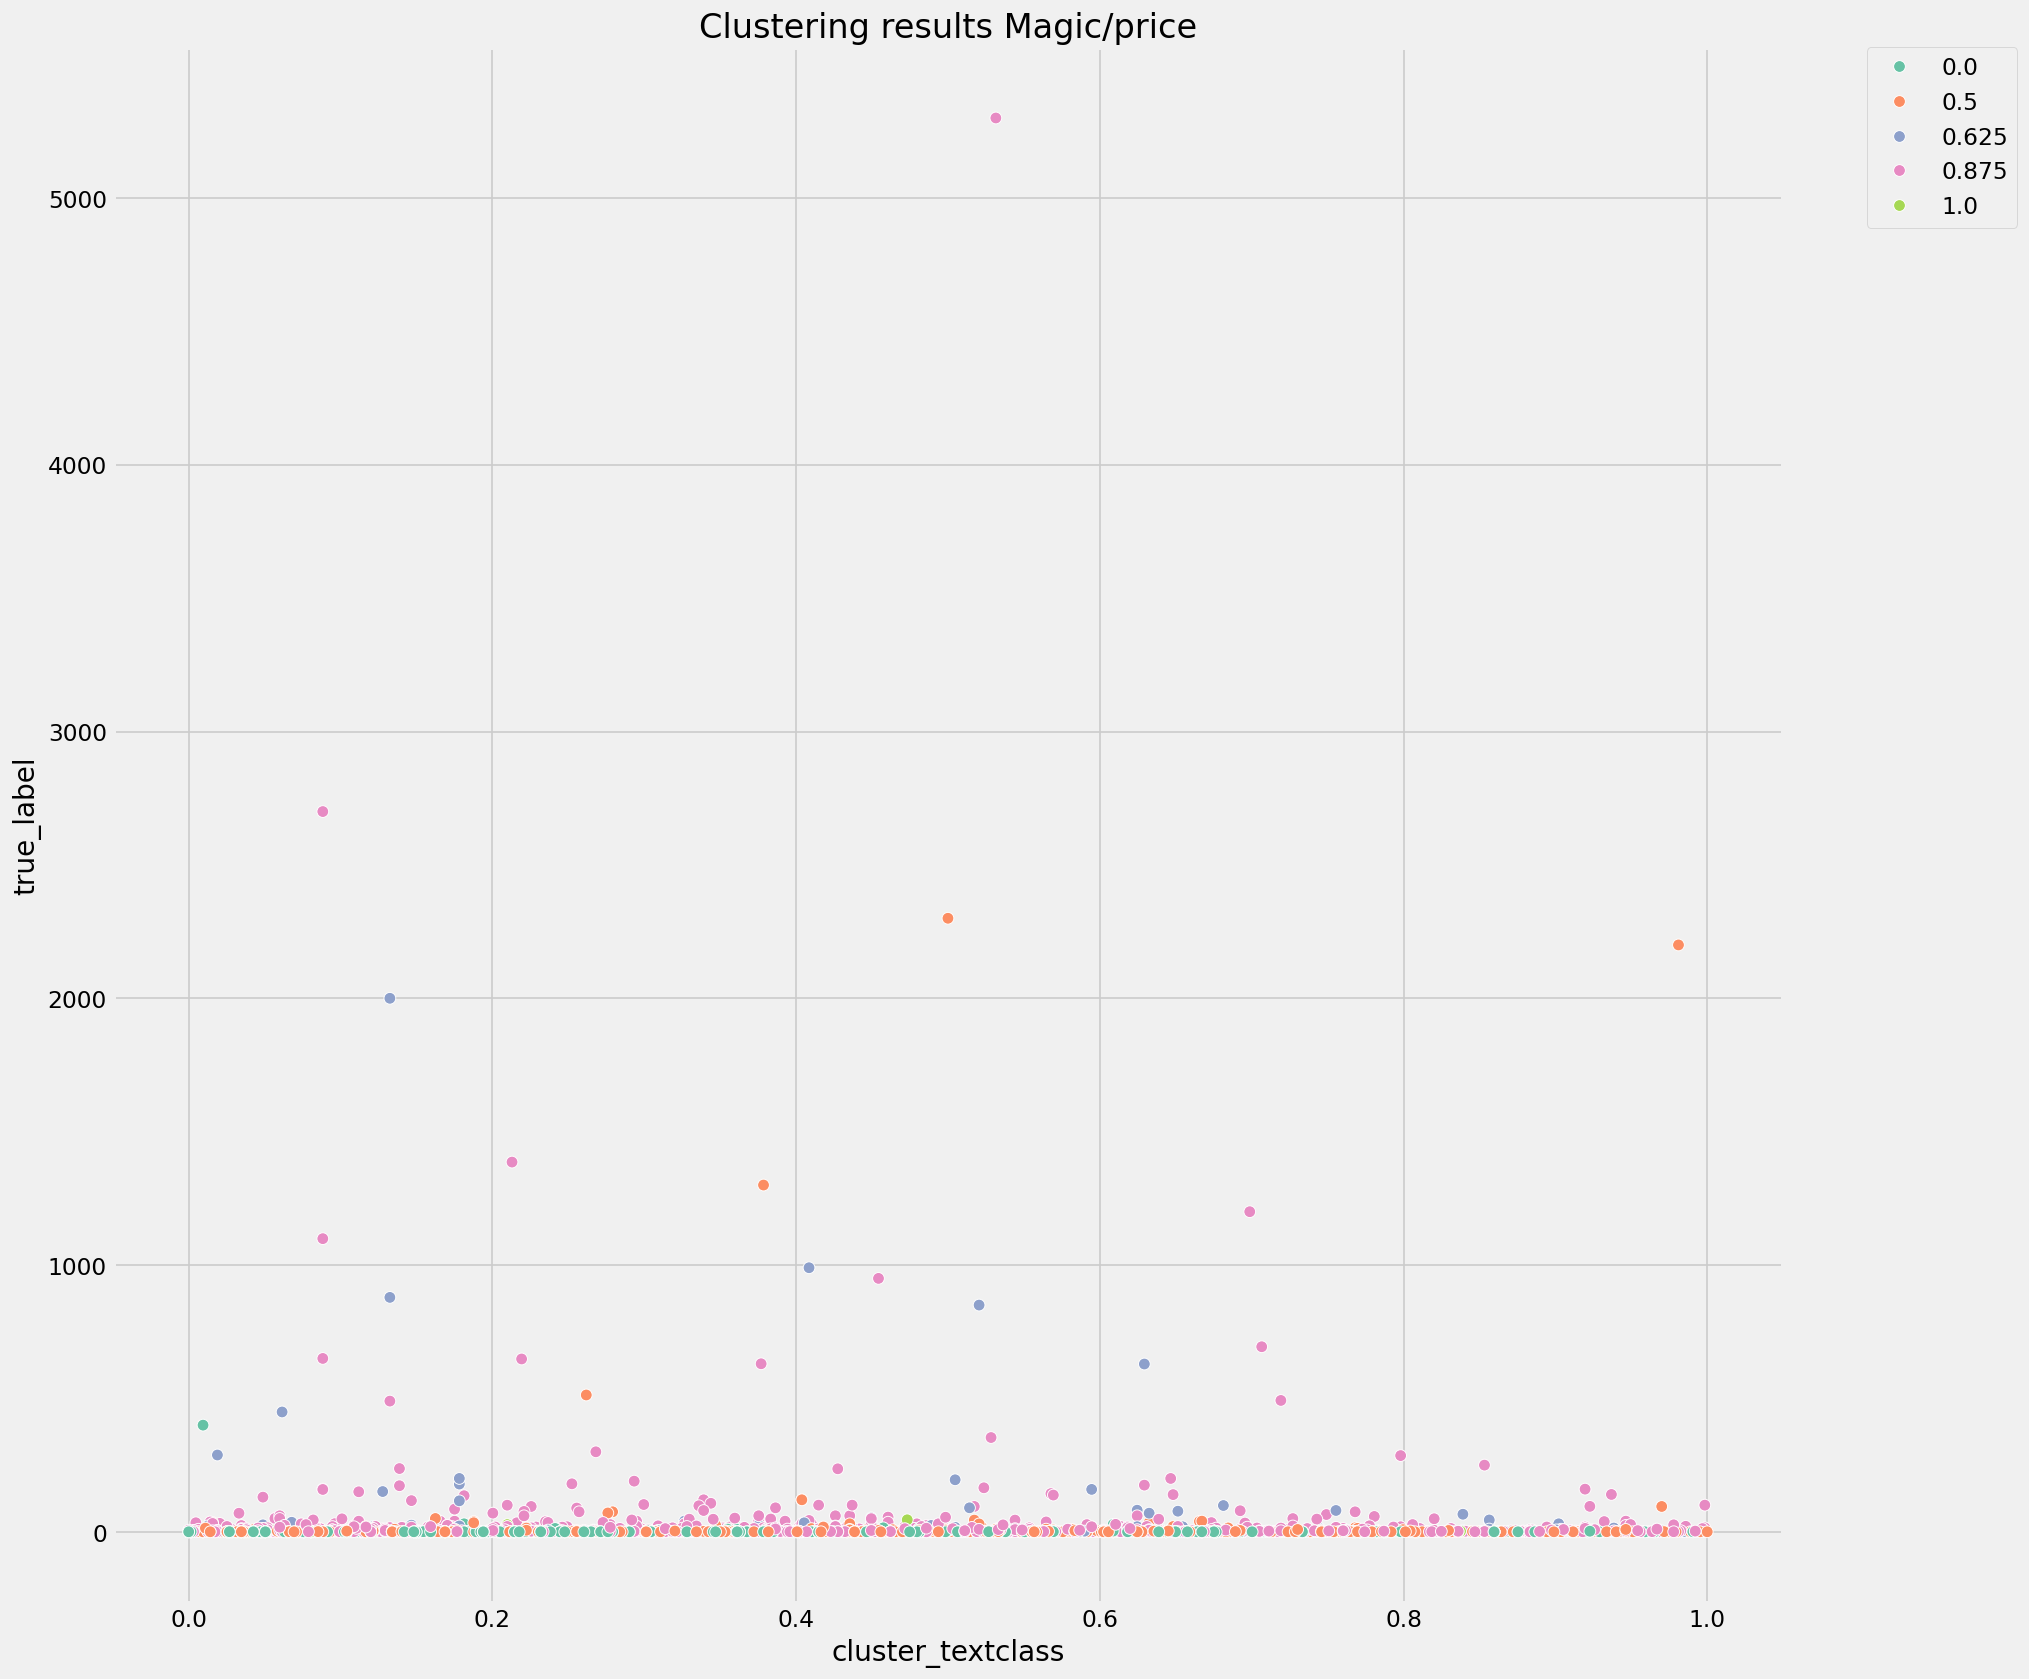

In [503]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(target)
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

print(n_clusters)
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        # ("pca", PCA(n_components=5, random_state=42)),
    ]
)
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)
pipe = Pipeline([("preprocessor", preprocessor), ("clusterer", clusterer)])
pipe.fit(feature)
preprocessed_data = pipe["preprocessor"].transform(feature)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(silhouette_score(preprocessed_data, predicted_labels))
adjusted_rand_score(true_labels, predicted_labels)
dfcluster = pd.DataFrame(
    pipe["preprocessor"].transform(feature),
    columns=feature.columns,
)

dfcluster["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
dfcluster["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 16))

scat = sns.scatterplot(
    data=dfcluster[
        ["cluster_textclass", "predicted_cluster", "true_label", "rarity_categorized"]
    ],
    x="cluster_textclass",
    y="true_label",
    s=50,
    hue="rarity_categorized",
    # style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results Magic/price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [504]:
from umap import UMAP
import plotly.express as px

features = dfcluster

umap_2d = UMAP(n_components=2, init="random", random_state=42)
umap_3d = UMAP(n_components=3, init="random", random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d,
    x=dfcluster["cluster_textclass"],
    y=dfcluster["predicted_cluster"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d = px.scatter_3d(
    proj_3d,
    y=dfcluster["cluster_textclass"],
    x=dfcluster["predicted_cluster"],
    z=dfcluster["true_label"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d.update_traces(marker_size=2)

fig_2d.show()
fig_3d.show()

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Previsão do preço

In [505]:
X_test

cmc  rarity_categorized  cluster_textclass
name                                                           
Weakness               1                   0                 95
Reduce in Stature      3                   0                228
Wolfcaller's Howl      4                   7                267
Test of Endurance      4                   5                  8
Nature's Chosen        1                   4                487
...                  ...                 ...                ...
Commanding Presence    4                   4                 23
Messenger's Speed      1                   0                107
Nyxborn Wolf           3                   0                 96
Common Cause           3                   7                 47
Skola Grovedancer      2                   0                506

[508 rows x 3 columns]

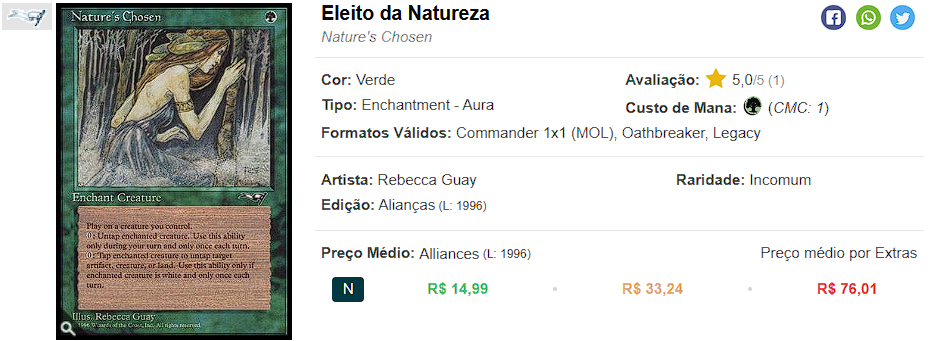

In [506]:
test_text = "Enchant creature you control {0}: Untap enchanted creature. Activate only during your turn and only once each turn. Tap enchanted creature: Untap target artifact, creature, or land. Activate only if enchanted creature is white and untapped and only once each turn."
textclass = clustering_model.predict(embedder.encode(test_text).reshape(1, -1))
# alterar valores conforme atributos da carta a ser testada e o valor de saída de classificação do texto
valores = [[1, 4, textclass]]

test_input = pd.DataFrame(
    valores,
    columns=["cmc", "rarity_categorized", "cluster_textclass"],
)
dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
from scipy import stats

value_list = dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
stats.bayes_mvs(value_list, 0.908)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\3673696992.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\3673696992.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



(Mean(statistic=5.046666666666666, minmax=(-10.206461894954408, 20.29979522828773)),
 Variance(statistic=inf, minmax=(24.13114167546585, 1577.8296223997631)),
 Std_dev(statistic=15.278360280576925, minmax=(4.9123458424123445, 39.72190355962014)))

Aqui há um claro exemplo de como podemos ver com o desvio padrão de 4.92-39.72 a carta mesmo sendo classificada como 5 o cluster demonstra claramente que é possivel q seja uma carta a não seguir a média e pode estourar até mesmo o max de 20 reais.

# Mágicas Instantâneas 

In [507]:
df_inst

tipo  cmc  \
name                                         
Bandage                       Instant    1   
Beacon of Immortality         Instant    6   
Demystify                     Instant    1   
Hail of Arrows                Instant    1   
Holy Day                      Instant    1   
...                               ...  ...   
Runeflare Trap         Instant — Trap    6   
Seismic Shudder               Instant    2   
Unstable Footing              Instant    1   
Primal Bellow                 Instant    1   
Tanglesap                     Instant    2   

                                                                   texto  \
name                                                                       
Bandage                Prevent the next 1 damage that would be dealt ...   
Beacon of Immortality  Double target player’s life total. Shuffle Bea...   
Demystify                                    Destroy target enchantment.   
Hail of Arrows         Hail of Arrows deals X damage divided as you c...   
Holy Day               Prevent all combat damage that would be dealt ...   
...                                                                  ...   
Runeflare Trap         If an opponent drew three or more cards this t...   
Seismic Shudder        Seismic Shudder deals 1 damage to each creatur...   
Unstable Footing       Kicker {3}{R} (You may pay an additional {3}{R...   
Primal Bellow          Target creature gets +1/+1 until end of turn f...   
Tanglesap              Prevent all combat damage that would be dealt ...   

                      raridades  preços  rarity_categorized  cluster_textclass  
name                                                                            
Bandage                   Comum    0.18                   0                 56  
Beacon of Immortality      Rara   14.00                   7                 32  
Demystify                 Comum    0.03                   0                 49  
Hail of Arrows          Incomum    0.15                   4                187  
Holy Day                  Comum    1.25                   0                151  
...                         ...     ...                 ...                ...  
Runeflare Trap          Incomum    0.04                   4                171  
Seismic Shudder           Comum    0.05                   0                481  
Unstable Footing        Incomum    0.04                   4                470  
Primal Bellow           Incomum    0.45                   4                443  
Tanglesap                 Comum    0.05                   0                151  

[2509 rows x 7 columns]

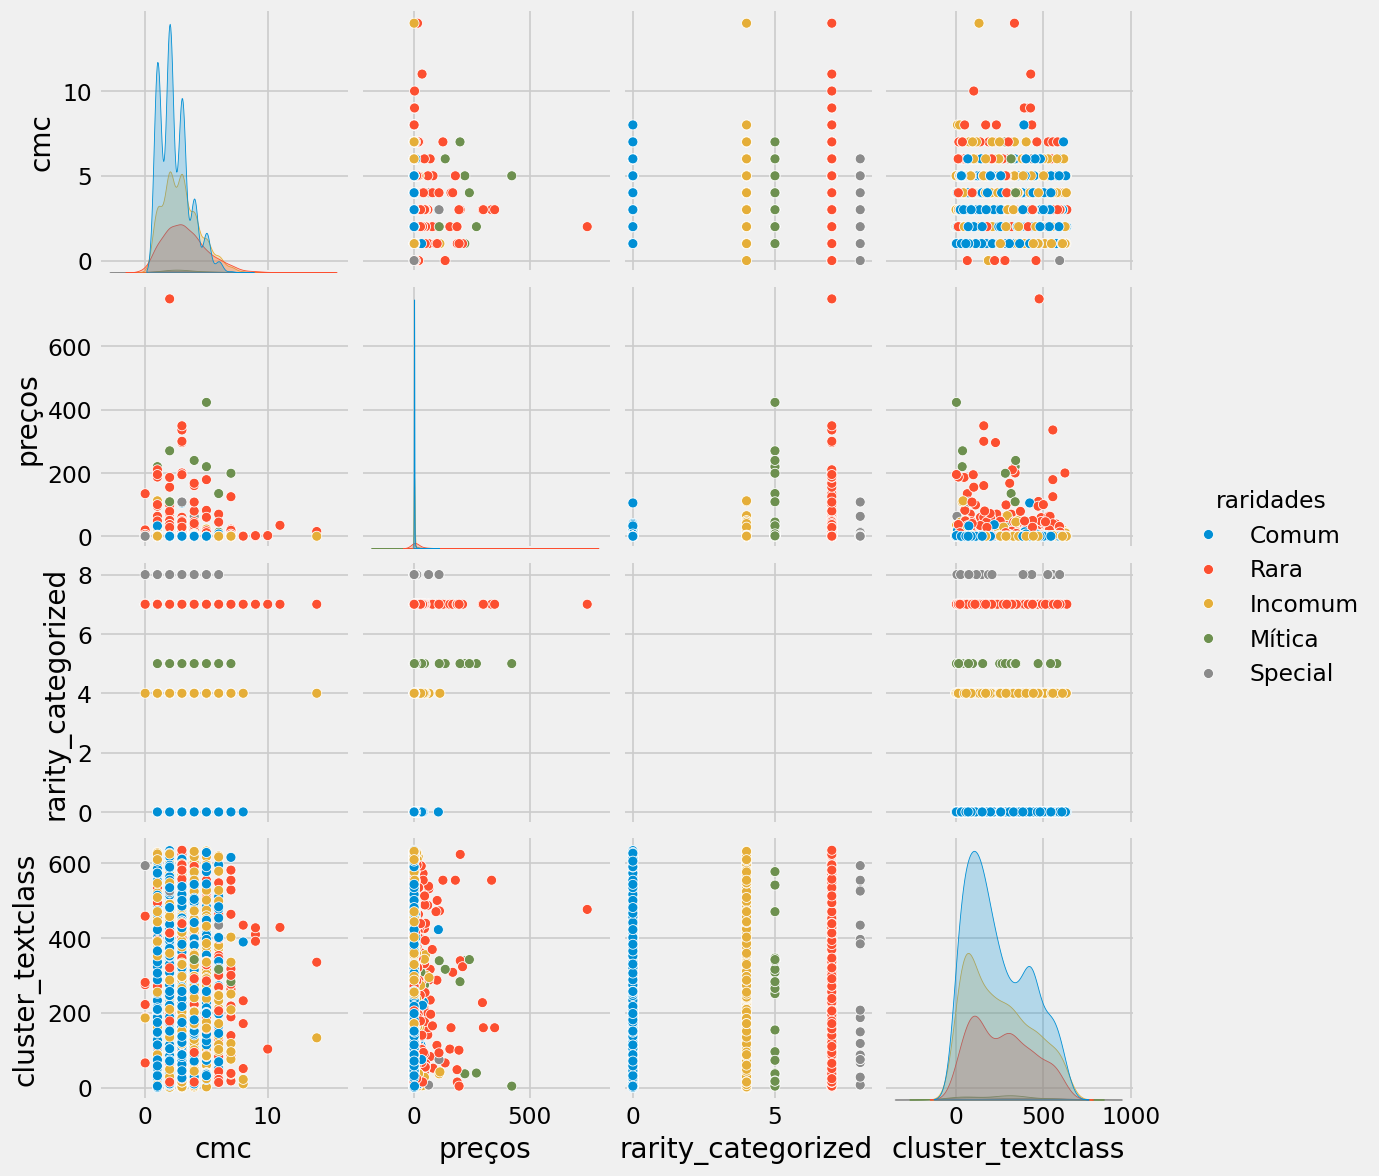

In [508]:
import seaborn as sns

sns.pairplot(df_inst, hue="raridades")

Clusterização do Texto

In [509]:
sentences = df_inst.texto.to_list()
embedder = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
corpus_embeddings = embedder.encode(sentences)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings / np.linalg.norm(
    corpus_embeddings, axis=1, keepdims=True
)
clustering_model = KMeans(n_clusters=635)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
df_inst["cluster_textclass"] = cluster_assignment

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2901297342.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Clusterização Geral (textos + atributos)

In [510]:
noatributes = ["tipo", "texto", "preços", "raridades"]
feature = df_inst.drop(columns=[col for col in df_enc if col in noatributes])
target = df_inst["preços"]
X_train_val, X_test, y_train_val, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=None
)  # hold out 20% of the data for final testing

471
0.6154134859980122


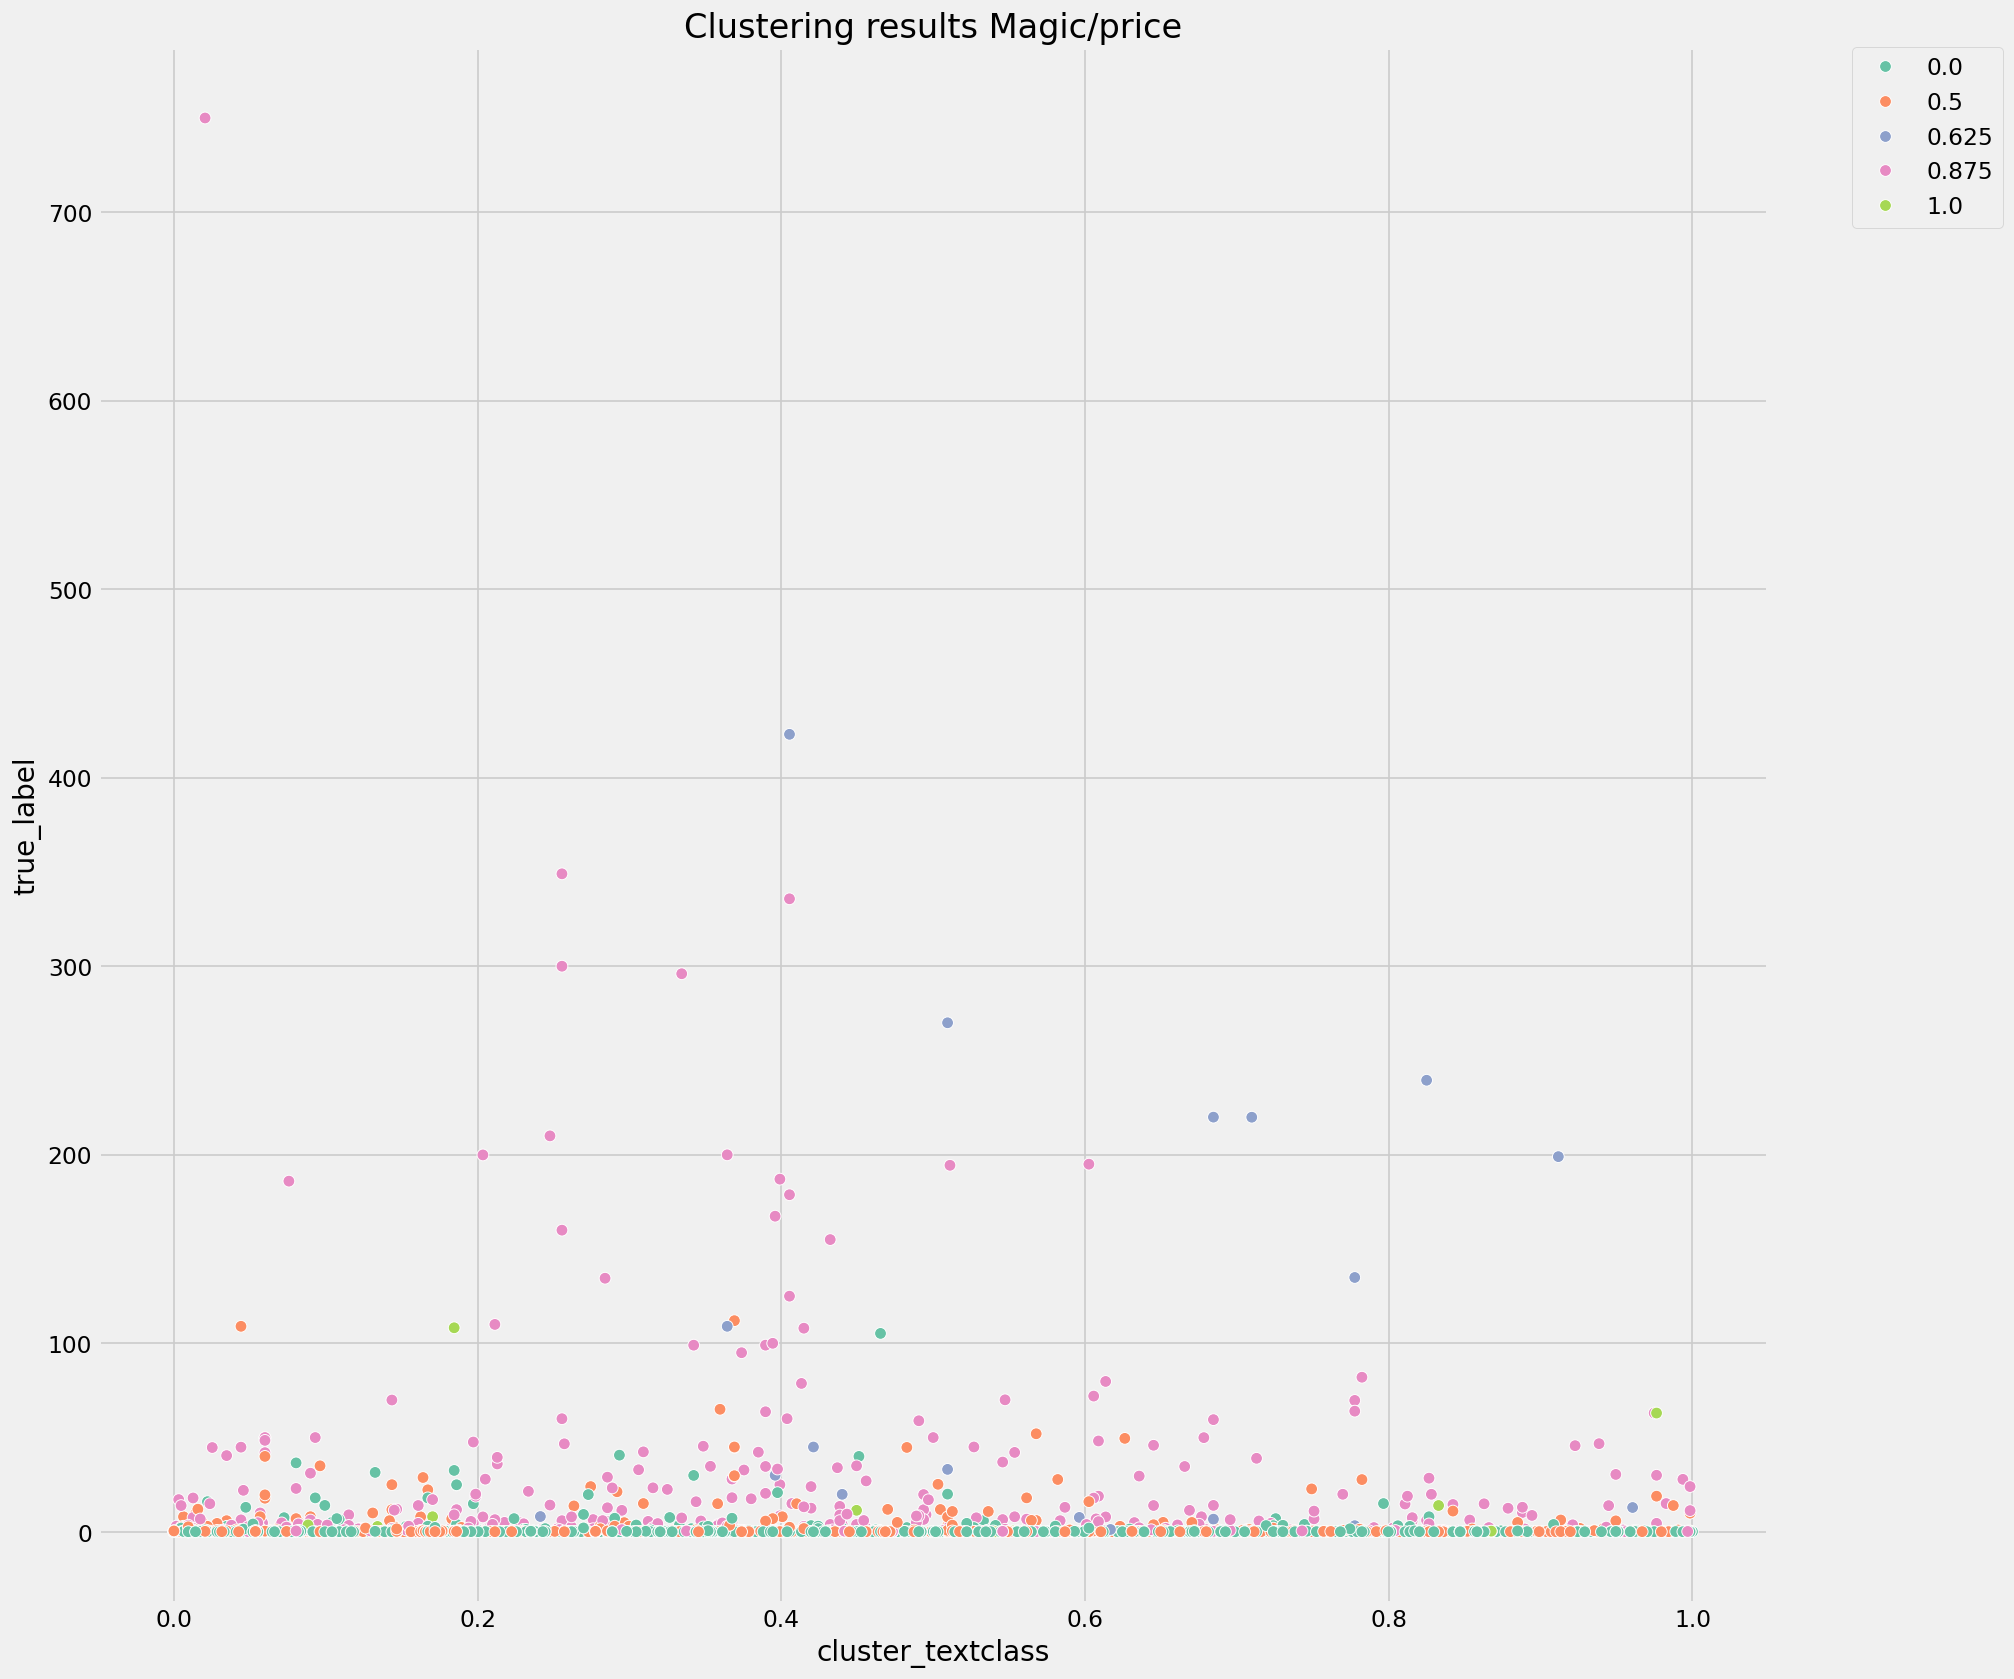

In [511]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(target)
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

print(n_clusters)
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        # ("pca", PCA(n_components=5, random_state=42)),
    ]
)
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)
pipe = Pipeline([("preprocessor", preprocessor), ("clusterer", clusterer)])
pipe.fit(feature)
preprocessed_data = pipe["preprocessor"].transform(feature)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(silhouette_score(preprocessed_data, predicted_labels))
adjusted_rand_score(true_labels, predicted_labels)
dfcluster = pd.DataFrame(
    pipe["preprocessor"].transform(feature),
    columns=feature.columns,
)

dfcluster["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
dfcluster["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 16))

scat = sns.scatterplot(
    data=dfcluster[
        ["cluster_textclass", "predicted_cluster", "true_label", "rarity_categorized"]
    ],
    x="cluster_textclass",
    y="true_label",
    s=50,
    hue="rarity_categorized",
    # style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results Magic/price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [512]:
from umap import UMAP
import plotly.express as px

features = dfcluster

umap_2d = UMAP(n_components=2, init="random", random_state=42)
umap_3d = UMAP(n_components=3, init="random", random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d,
    x=dfcluster["cluster_textclass"],
    y=dfcluster["predicted_cluster"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d = px.scatter_3d(
    proj_3d,
    y=dfcluster["cluster_textclass"],
    x=dfcluster["predicted_cluster"],
    z=dfcluster["true_label"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d.update_traces(marker_size=2)

fig_2d.show()
fig_3d.show()

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Previsão do preço

In [513]:
X_test

cmc  rarity_categorized  cluster_textclass
name                                                              
Wrap in Vigor             2                   0                524
Expansion // Explosion    6                   7                175
Diviner's Portent         3                   7                335
Change of Heart           1                   0                176
Psychic Spiral            5                   4                267
...                     ...                 ...                ...
Supplant Form             6                   7                 69
Disturbed Slumber         2                   0                165
Bring the Ending          2                   0                560
Shadow Rift               1                   0                155
Devour Flesh              2                   0                177

[502 rows x 3 columns]

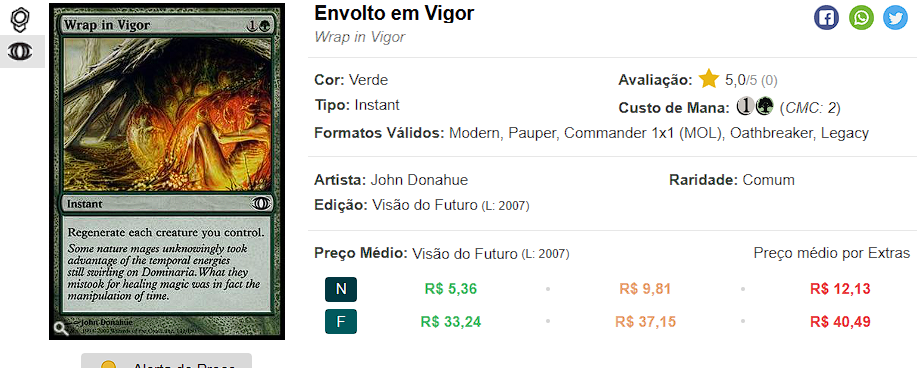

In [515]:
test_text = "Regenerate each creature you control."
textclass = clustering_model.predict(embedder.encode(test_text).reshape(1, -1))
# alterar valores conforme atributos da carta a ser testada e o valor de saída de classificação do texto
valores = [[2, 0, textclass]]

test_input = pd.DataFrame(
    valores,
    columns=["cmc", "rarity_categorized", "cluster_textclass"],
)
dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
from scipy import stats

value_list = dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
stats.bayes_mvs(value_list, 0.908)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2114960442.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\2114960442.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



(Mean(statistic=1.1942857142857144, minmax=(-1.0748552005934546, 3.4634266291648825)),
 Variance(statistic=13.47114285714286, minmax=(4.203453827474665, 34.10280216701183)),
 Std_dev(statistic=3.450034378991424, minmax=(2.050232627648547, 5.8397604545915955)))

Nesta carta podemos notar como muitas vezes apenas o agrupamento dos vetores de sentença e o custo de mana não serão suficientes para trazer uma predição correta visto que o vetor não tras consigo uma inferência de entendimento do jogo. Porém ainda pelo desvio padrão é possivel notar que a carta pode por semelhança a uma do cluster chegar a 5.83 o que condiz proximamente com a realidade do preço mínimo.

# Terrenos

In [516]:
df_terr

tipo  \
name                          
Stun                   Land   
Adarkar Wastes         Land   
Battlefield Forge      Land   
Brushland              Land   
Caves of Koilos        Land   
...                     ...   
Edgewall Inn           Land   
Lotus Vale             Land   
Scorched Ruins         Land   
Winding Canyons        Land   
Magosi, the Waterveil  Land   

                                                                   texto  \
name                                                                       
Stun                   {T}: Add {C}.{3}, {T}: Target creature with po...   
Adarkar Wastes         {T}: Add {C}.{T}: Add {W} or {U}. Adarkar Wast...   
Battlefield Forge      {T}: Add {C}.{T}: Add {R} or {W}. Battlefield ...   
Brushland              {T}: Add {C}.{T}: Add {G} or {W}. Brushland de...   
Caves of Koilos        {T}: Add {C}.{T}: Add {W} or {B}. Caves of Koi...   
...                                                                  ...   
Edgewall Inn           Edgewall Inn enters the battlefield tapped.As ...   
Lotus Vale             If Lotus Vale would enter the battlefield, sac...   
Scorched Ruins         If Scorched Ruins would enter the battlefield,...   
Winding Canyons        {T}: Add {C}.{2}, {T}: You may cast creature s...   
Magosi, the Waterveil  Magosi, the Waterveil enters the battlefield t...   

                      raridades  preços  rarity_categorized  
name                                                         
Stun                      Comum    0.15                   0  
Adarkar Wastes             Rara   40.00                   7  
Battlefield Forge          Rara   11.44                   7  
Brushland                  Rara   18.49                   7  
Caves of Koilos            Rara    6.98                   7  
...                         ...     ...                 ...  
Edgewall Inn            Incomum    0.17                   4  
Lotus Vale                 Rara   78.95                   7  
Scorched Ruins             Rara  107.00                   7  
Winding Canyons            Rara   45.02                   7  
Magosi, the Waterveil      Rara    2.60                   7  

[725 rows x 5 columns]

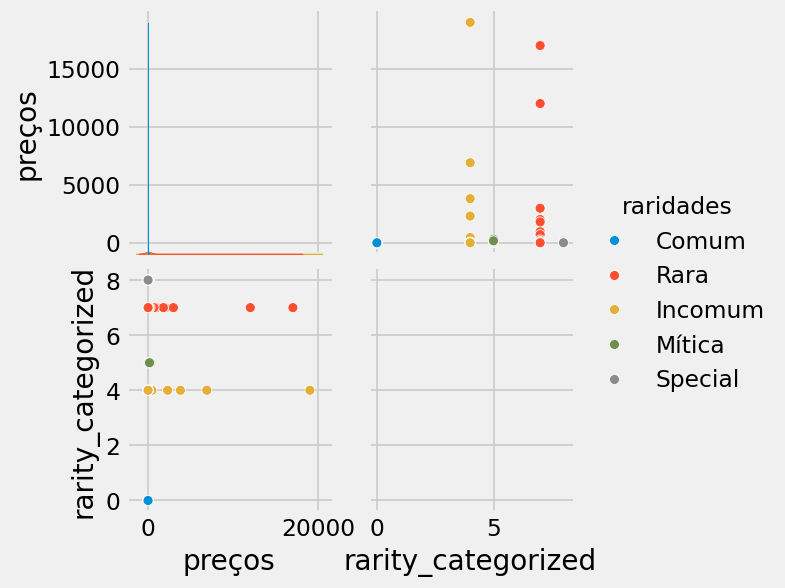

In [517]:
import seaborn as sns

sns.pairplot(df_terr, hue="raridades")

Clusterização Texto

In [518]:
sentences = df_terr.texto.to_list()
embedder = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
corpus_embeddings = embedder.encode(sentences)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings / np.linalg.norm(
    corpus_embeddings, axis=1, keepdims=True
)
clustering_model = KMeans(n_clusters=635)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
df_terr["cluster_textclass"] = cluster_assignment

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\526857080.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CLusterização Geral (Texto + atributos) 

In [519]:
noatributes = ["tipo", "texto", "preços", "raridades"]
feature = df_terr.drop(columns=[col for col in df_enc if col in noatributes])
target = df_terr["preços"]
X_train_val, X_test, y_train_val, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=None
)  # hold out 20% of the data for final testing

388
0.4769436883286639


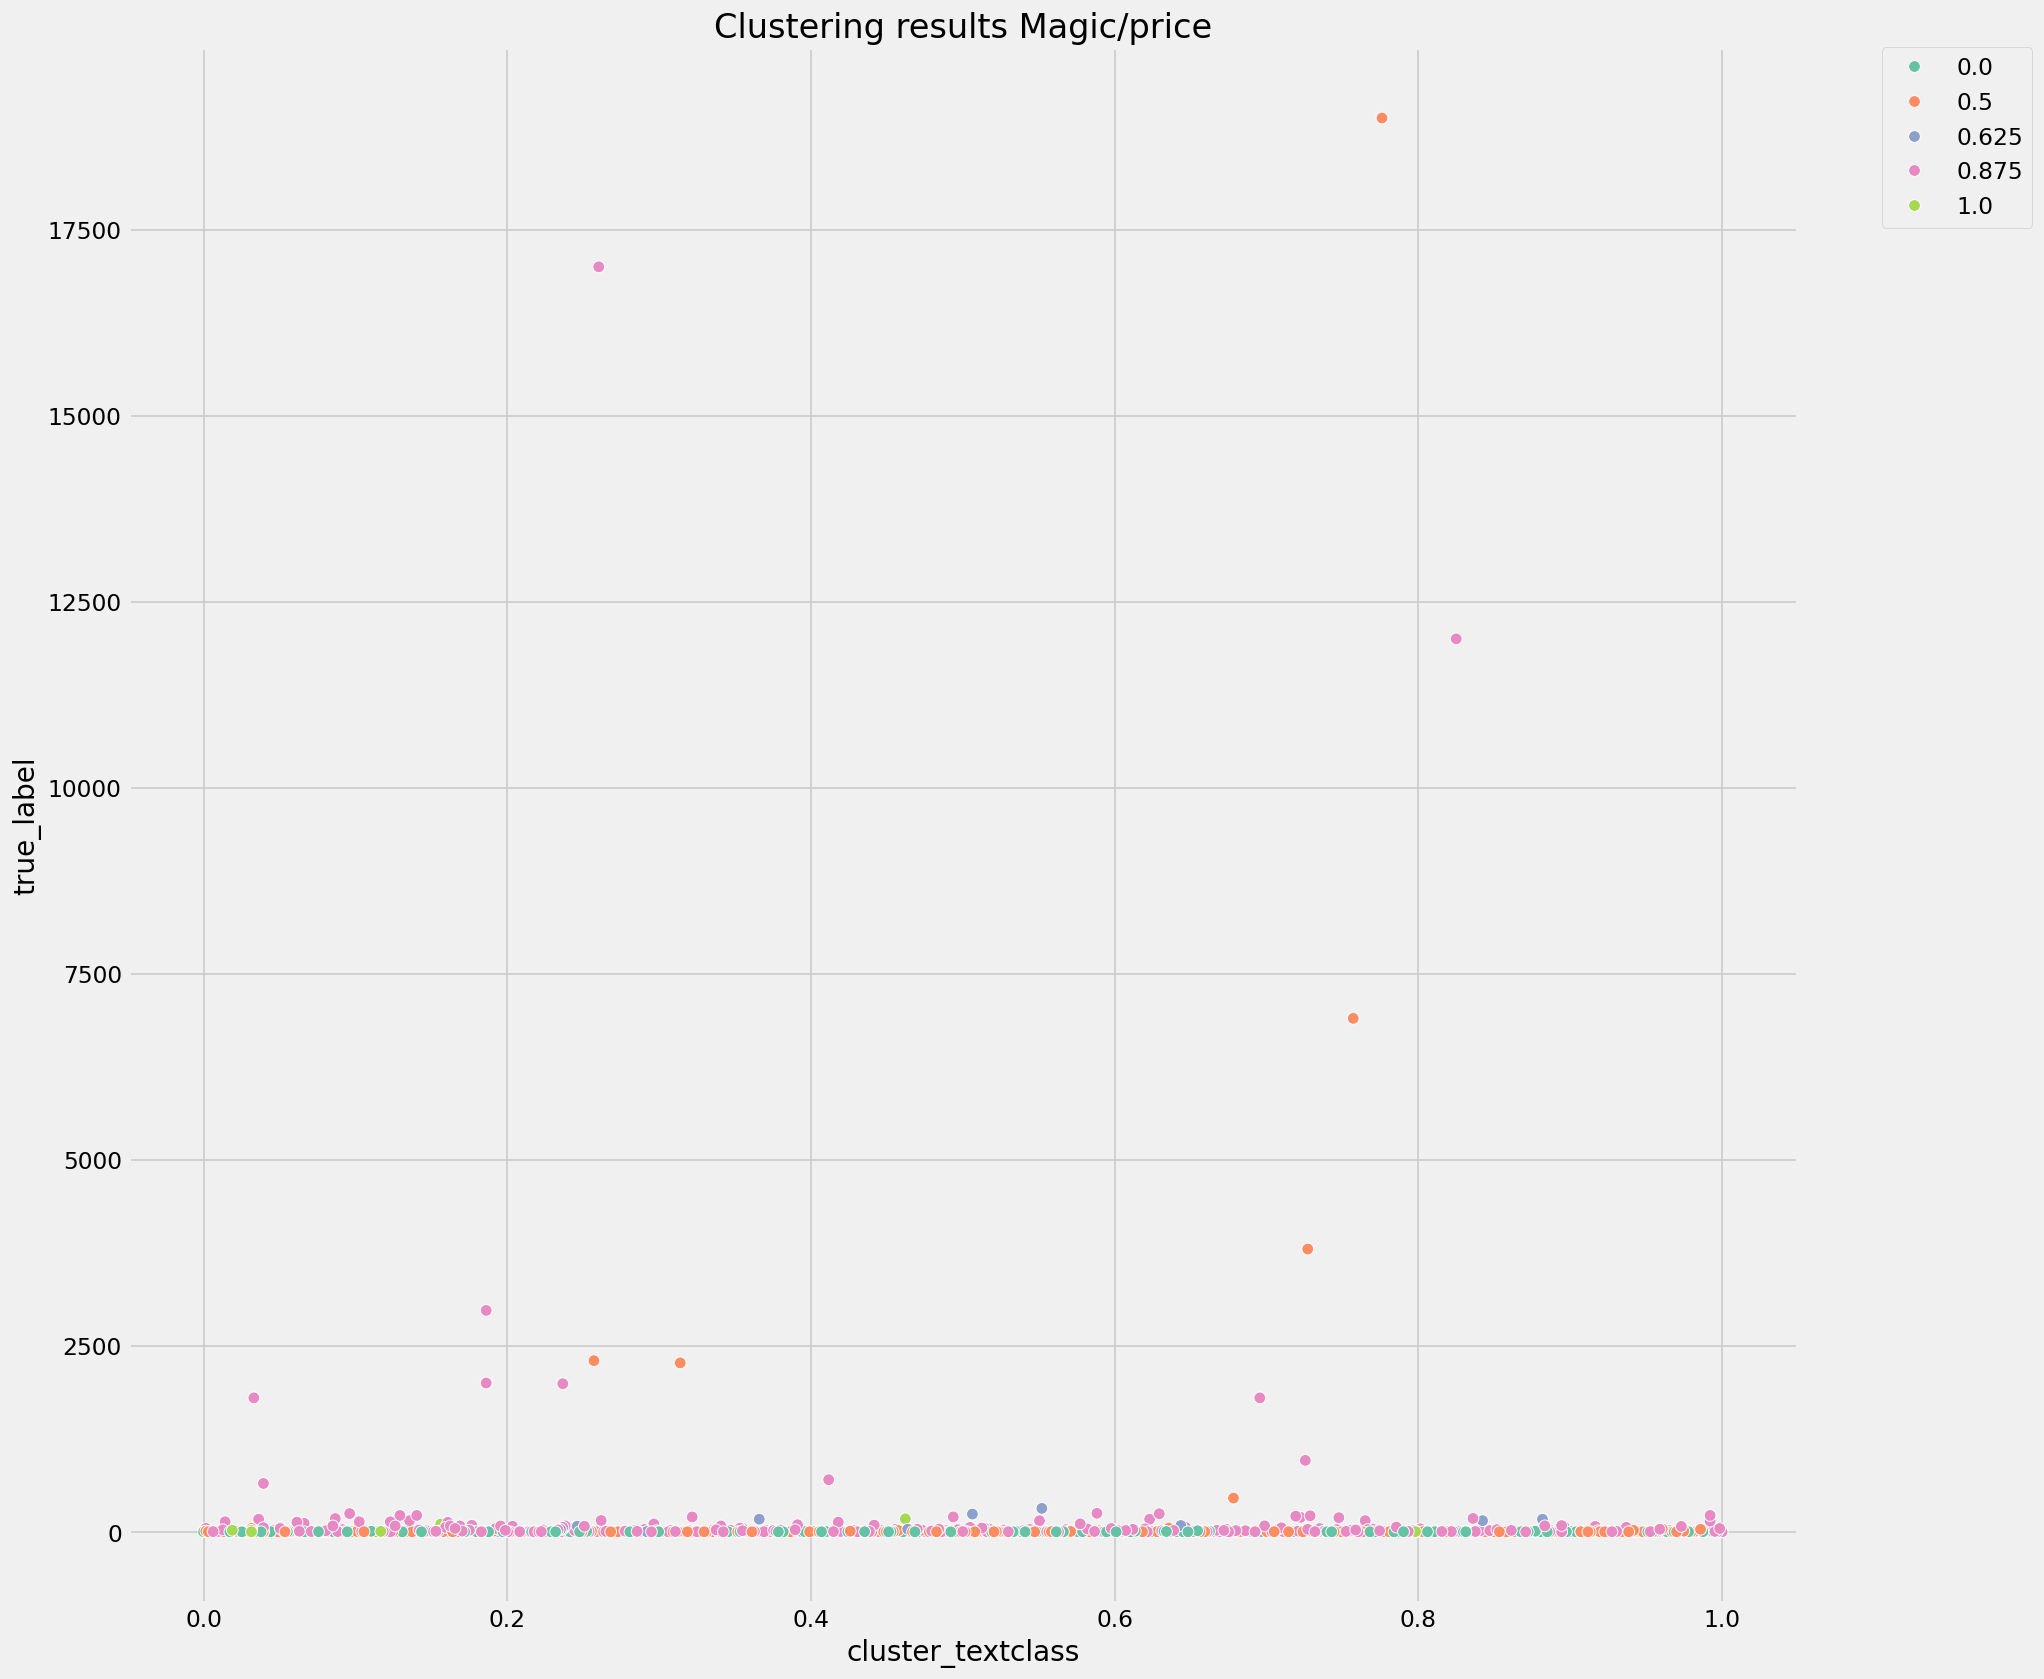

In [520]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(target)
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

print(n_clusters)
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        # ("pca", PCA(n_components=5, random_state=42)),
    ]
)
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)
pipe = Pipeline([("preprocessor", preprocessor), ("clusterer", clusterer)])
pipe.fit(feature)
preprocessed_data = pipe["preprocessor"].transform(feature)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print(silhouette_score(preprocessed_data, predicted_labels))
adjusted_rand_score(true_labels, predicted_labels)
dfcluster = pd.DataFrame(
    pipe["preprocessor"].transform(feature),
    columns=feature.columns,
)

dfcluster["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
dfcluster["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16, 16))

scat = sns.scatterplot(
    data=dfcluster[
        ["cluster_textclass", "predicted_cluster", "true_label", "rarity_categorized"]
    ],
    x="cluster_textclass",
    y="true_label",
    s=50,
    hue="rarity_categorized",
    # style="true_label",
    palette="Set2",
)

scat.set_title("Clustering results Magic/price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [521]:
from umap import UMAP
import plotly.express as px

features = dfcluster

umap_2d = UMAP(n_components=2, init="random", random_state=42)
umap_3d = UMAP(n_components=3, init="random", random_state=42)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d,
    x=dfcluster["cluster_textclass"],
    y=dfcluster["predicted_cluster"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d = px.scatter_3d(
    proj_3d,
    y=dfcluster["cluster_textclass"],
    x=dfcluster["predicted_cluster"],
    z=dfcluster["true_label"],
    color=dfcluster["predicted_cluster"],
    labels={"color": "predicted_cluster"},
)
fig_3d.update_traces(marker_size=2)

fig_2d.show()
fig_3d.show()

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\drodm\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Previsão do preço

In [522]:
X_test

rarity_categorized  cluster_textclass
name                                                            
Great Hall of the Citadel                   0                224
Soaring Seacliff                            0                 83
Temple Garden                               7                 86
Forge of Heroes                             0                114
Mishra's Factory                            4                 81
...                                       ...                ...
Urza's Factory                              4                386
Auntie's Hovel                              7                247
Plains                                      0                150
Icatian Store                               7                 13
Scattered Groves                            7                235

[145 rows x 2 columns]

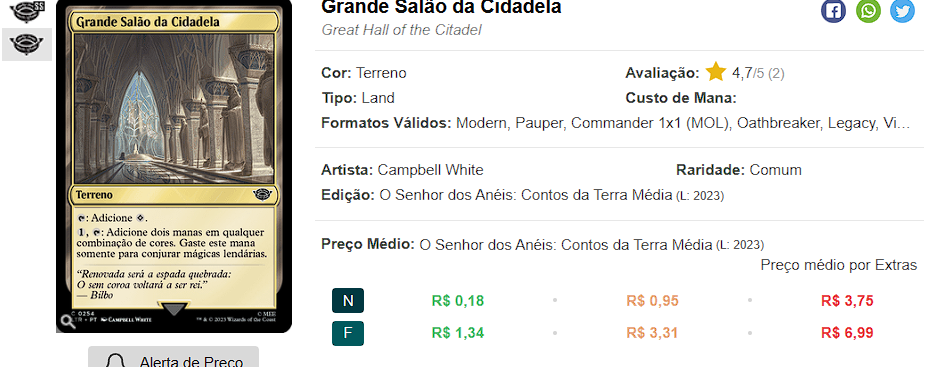

In [528]:
test_text = ": Adicione {C}.{1}, {T}: Adicione dois manas em qualquer combinação de cores. Gaste este mana somente para conjurar mágicas lendárias."
textclass = clustering_model.predict(embedder.encode(test_text).reshape(1, -1))
# alterar valores conforme atributos da carta a ser testada e o valor de saída de classificação do texto
valores = [[7, textclass]]

test_input = pd.DataFrame(
    valores,
    columns=["rarity_categorized", "cluster_textclass"],
)
dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
]
from scipy import stats
try:
    value_list = dfcluster["true_label"].loc[
        dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
    ]
    stats.bayes_mvs(value_list, 0.908)
except:
    print(dfcluster["true_label"].loc[
    dfcluster["predicted_cluster"] == int(pipe.predict(test_input))
])

336    4.5
Name: true_label, dtype: float64


C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\904575017.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\904575017.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\drodm\AppData\Local\Temp\ipykernel_5484\904575017.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Neste caso é importante notar que foi clusterizado apenas 1 carta e portanto teremos apenas 1 indicação de qual seria o preço da carta. Neste caso a indicação é de 4.5 reais o que não é tão correto mas n foge muito do valor máximo do que o mercado quer pela carta.